<a href="https://colab.research.google.com/github/Luzdeyduque/Proyecto-de-grado-DPMVUTML-/blob/main/Modelos/PARKINSONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Librerias


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, accuracy_score, f1_score, r2_score, log_loss
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
import joblib
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from google.colab import files
from IPython.display import display
import numpy as np

#Carga de datos

In [ ]:
# Selecciona y sube el archivo CSV desde tu computadora
uploaded = files.upload()

# Cargar el dataset desde el archivo CSV subido
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)


Saving PARKINSONS.csv to PARKINSONS (2).csv


#Visualización y procesamiento de datos

##Visualización de datos sin depurar

In [ ]:
# Eliminar las columnas no deseadas (columnas Unnamed)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Eliminar las columnas específicas
#df = df.drop(['PPE', 'DFA', 'spread1', 'spread2', 'D2', 'RPDE'], axis=1)

#Datos sin procesar
print('Número de características en el dataset sin depurar:', df.shape[1])
print('Número de datos en el dataset :                     ', df.shape[0],'\n')

print("Dataset sin depurar:")
display(df.head(300))


Número de características en el dataset sin depurar: 23
Número de datos en el dataset :                      195 

Dataset sin depurar:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [ ]:
print("\nCuenta los datos Non-Null y Dtype: \n")
df.info()


Cuenta los datos Non-Null y Dtype: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE  

##Depuración de datos

In [ ]:
#df.drop(['AUDIO'], axis=1, inplace=True) #Elimina la columna AUDIO
df['status'] = df['status'].astype('uint8') #Baja de INT68 a INT8
# Eliminar las columnas específicas
df = df.drop(['PPE', 'DFA', 'spread1', 'spread2', 'D2', 'RPDE'], axis=1)

#df.drop(['status'], axis=1, inplace=True) #Elimina la columna de status para que solo quede STATUS
#df['Gender'] = df['Gender'].astype('uint8') #Baja de INT68 a INT8
#df.drop(['Gender'], axis=1, inplace=True) #Elimina la columna de Gender

#Datos depurados
print('Número de características en el dataset depurado: ', df.shape[1])
print('Número de datos en el dataset:                    ', df.shape[0])

Número de características en el dataset depurado:  17
Número de datos en el dataset:                     195


##Visualización

In [ ]:
# Se revisa si el dataset tiene filas duplicadas
print('Número de filas duplicadas :',df.duplicated().sum())

Número de filas duplicadas : 0


In [ ]:
# Se revisa si las columnas tiene columnas faltantes
df.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


In [ ]:
print("Dataset depurado:")
display(df.head(300))

Dataset depurado:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0


In [ ]:
print("\nCUENTA DE VALORES Non-Null Y Dtype DE LAS CARACTERÍSTICAS: \n")
df.info()


CUENTA DE VALORES Non-Null Y Dtype DE LAS CARACTERÍSTICAS: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-nul

<Axes: xlabel='status', ylabel='count'>

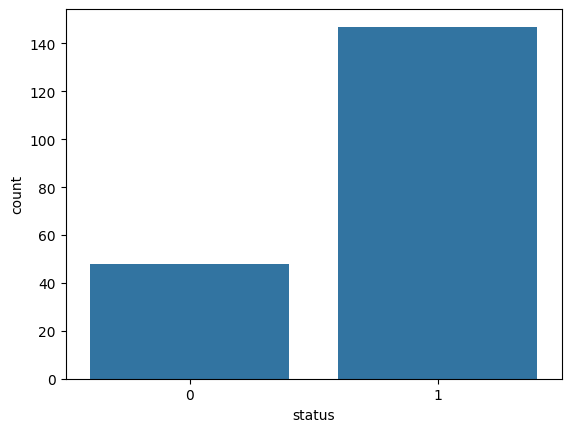

In [ ]:
# Se explora que el dataset no está balanceado
df['status'].value_counts()
sns.countplot(x='status',data=df)

In [ ]:
df.describe() #Descripción estadística

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000


#Métodos de selección de características

##Calculo de χ²

In [ ]:
# Variable objetivo y características
discrete_df = pd.DataFrame() #Hace que el type de discrete_df sea DF

# Discretizar todas las variables continuas
for column in df.columns:
    if df[column].dtype in ['float64']:  # Verificar si es continua (float o int)
        discrete_df[column + '_discretized'] = pd.qcut(df[column], q=9, labels=False, duplicates='drop')  # Discretizar en 9 intervalos
        #Donde 'q' se haya con la fórmula de Criterio de Sturges : q = log2(n)+1, donde n es el número de datos (300)
    else:
        discrete_df[column] = df[column]  # No discretiza

X = discrete_df.drop(columns=['status'])
y = df['status']

# Estandarizar los datos: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("\nX_scaled")
X_scaled.head(300)# Este no sirve porque está discretizado



X_scaled


,MDVP:Fo(Hz)_discretized,MDVP:Fhi(Hz)_discretized,MDVP:Flo(Hz)_discretized,MDVP:Jitter(%)_discretized,MDVP:Jitter(Abs)_discretized,MDVP:RAP_discretized,MDVP:PPQ_discretized,Jitter:DDP_discretized,MDVP:Shimmer_discretized,MDVP:Shimmer(dB)_discretized,Shimmer:APQ3_discretized,Shimmer:APQ5_discretized,MDVP:APQ_discretized,Shimmer:DDA_discretized,NHR_discretized,HNR_discretized
0,0.250,0.375,0.000,0.875,0.857143,0.750,1.000,0.750,0.875,0.875,0.875,0.875,0.750,0.875,0.750,0.375
1,0.375,0.375,0.625,0.875,0.857143,0.875,1.000,0.875,1.000,1.000,1.000,1.000,0.875,1.000,0.750,0.250
2,0.125,0.125,0.625,1.000,1.000000,1.000,1.000,1.000,0.875,0.875,0.875,1.000,0.875,0.875,0.500,0.375
3,0.125,0.250,0.625,1.000,1.000000,0.875,1.000,0.875,1.000,1.000,1.000,1.000,0.875,1.000,0.625,0.375
4,0.125,0.250,0.625,1.000,1.000000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.625,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.750,0.875,0.375,0.375,0.285714,0.500,0.500,0.500,0.875,0.875,0.875,0.875,0.750,0.875,0.875,0.250
191,1.000,0.875,0.250,0.625,0.285714,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.500,0.625,0.625,0.250
192,0.750,0.875,0.000,1.000,0.857143,1.000,1.000,1.000,0.500,0.625,0.500,0.500,0.375,0.500,1.000,0.125
193,0.875,1.000,0.000,0.750,0.428571,0.750,0.750,0.750,0.500,0.625,0.500,0.500,0.375,0.500,1.000,0.125


In [ ]:
# Aplicar SelectKBest con chi-cuadrado
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_scaled, y)

# Obtener y visualizar los puntajes χ²
chi2_scores = chi2_selector.scores_
feature_scores = pd.DataFrame({'Feature': X_scaled.columns, 'Chi2 Score': chi2_scores})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)
print(feature_scores)

                         Feature  Chi2 Score
12          MDVP:APQ_discretized    9.703710
4   MDVP:Jitter(Abs)_discretized    7.975537
6           MDVP:PPQ_discretized    7.540581
5           MDVP:RAP_discretized    7.151693
7         Jitter:DDP_discretized    7.151693
8       MDVP:Shimmer_discretized    7.122186
9   MDVP:Shimmer(dB)_discretized    7.122186
3     MDVP:Jitter(%)_discretized    6.995376
11      Shimmer:APQ5_discretized    6.687925
14               NHR_discretized    6.659100
10      Shimmer:APQ3_discretized    5.949524
13       Shimmer:DDA_discretized    5.949524
15               HNR_discretized    5.120443
0        MDVP:Fo(Hz)_discretized    3.761958
2       MDVP:Flo(Hz)_discretized    3.427734
1       MDVP:Fhi(Hz)_discretized    3.006285


### En base a esto se escoge las 10 características más relevantes de χ²:

-          MDVP:APQ_discretized    9.703710
-   MDVP:Jitter(Abs)_discretized    7.975537
-           MDVP:PPQ_discretized    7.540581
-           MDVP:RAP_discretized    7.151693
-         Jitter:DDP_discretized    7.151693
-       MDVP:Shimmer_discretized    7.122186
-   MDVP:Shimmer(dB)_discretized    7.122186
-     MDVP:Jitter(%)_discretized    6.995376
-      Shimmer:APQ5_discretized    6.687925
-               NHR_discretized    6.659100

   
  

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de status ya que pertenece solo a 'y' y elimina las características menos relevantes para χ²
X_ = df.drop(columns=['status','Shimmer:DDA','Shimmer:APQ3','HNR','MDVP:Fo(Hz)','MDVP:Flo(Hz)','MDVP:Fhi(Hz)'])
y = df['status']

X_CHI2 = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de χ²\n')
X_CHI2.head(10)

Dataset con las 10 primera características de χ²



,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ,NHR
0,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,0.347354,0.172448,0.068307
1,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,0.535685,0.279424,0.059331
2,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,0.446133,0.219848,0.039596
3,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,0.466079,0.233785,0.040997
4,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,0.577341,0.286852,0.054174
5,0.254130,0.288538,0.190270,0.352626,0.190079,0.342067,0.304848,0.401085,0.193277,0.036827
6,0.052414,0.090909,0.041908,0.058950,0.042061,0.059704,0.045193,0.049796,0.048396,0.017252
7,0.038755,0.090909,0.036609,0.048232,0.036442,0.055961,0.040263,0.051018,0.041121,0.008881
8,0.121665,0.209486,0.108382,0.128617,0.108525,0.103980,0.087099,0.095929,0.076422,0.031989
9,0.115629,0.209486,0.096339,0.128617,0.096163,0.171992,0.139688,0.156716,0.132093,0.030461


##Matriz de correlación

In [ ]:
#Verificamos que df no tenga cambios
df.head(300)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0


In [ ]:
# Variable objetivo y características
X = df.drop(columns=['status'])
y = df['status']

# Estandarizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

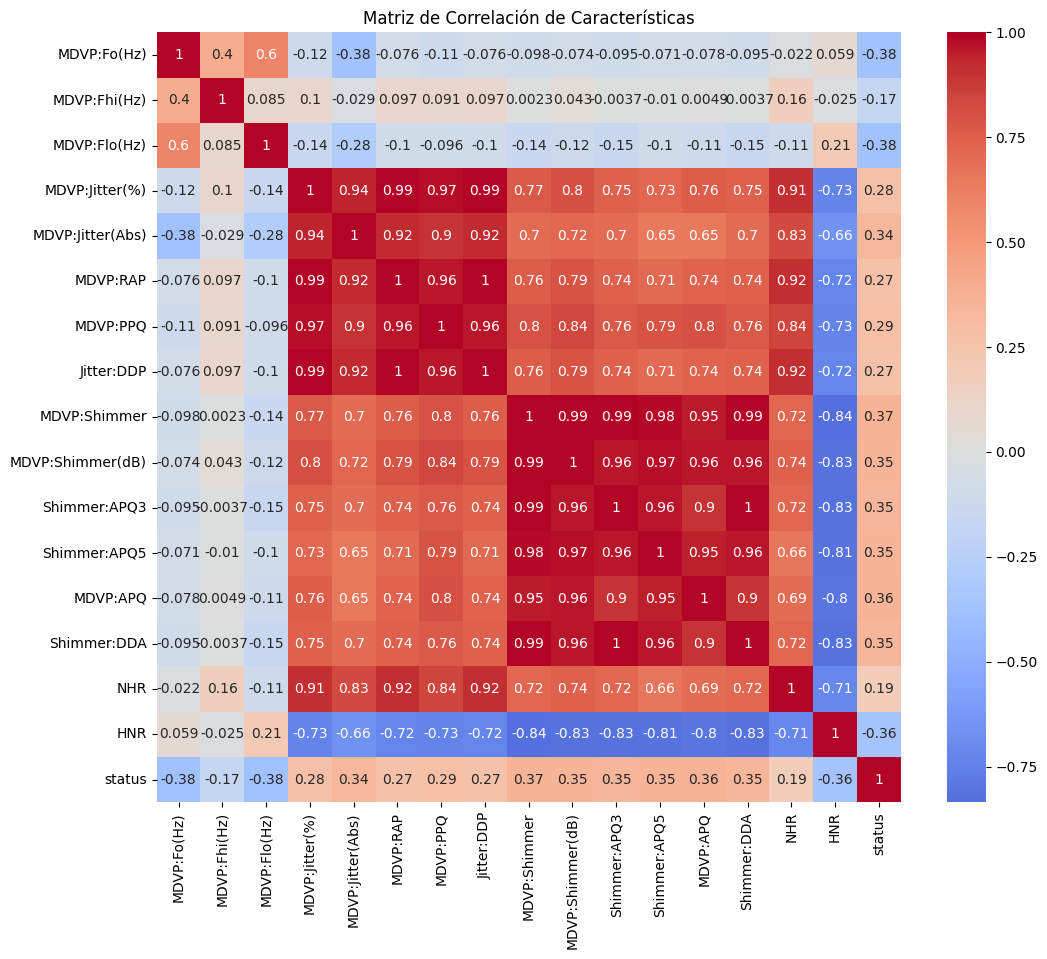

Características más correlacionadas con el objetivo:
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
MDVP:Jitter(Abs)    0.338653
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64


In [ ]:
# Supongamos que df es tu DataFrame original con características y 'STATUS' como la variable objetivo
X = df.drop(columns=['status'])  # Elimina 'STATUS' para la estandarización
y = df['status']  # Guarda 'STATUS' por separado

# Crear un scaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

# Seleccionar solo características numéricas continuas para la estandarización
numerical_features = X.select_dtypes(include=['float64'])  # Selecciona solo columnas de tipo float64

# Aplicar el scaler a las características numéricas continuas
scaled_features = scaler.fit_transform(numerical_features)

# Crear un DataFrame con las características estandarizadas
X_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Añadir la columna de 'gender' y 'STATUS' al DataFrame estandarizado
X_scaled['status'] = y.values

# Calcular la matriz de correlación
correlation_matrix = X_scaled.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.show()

# Obtener la correlación de las características con la variable objetivo
correlation_with_target = correlation_matrix['status'].abs().sort_values(ascending=False)

# Seleccionar las 10 características más correlacionadas con el objetivo
top_correlated_features = correlation_with_target[1:23]  # Excluir la correlación de 'STATUS' consigo mismo

# Imprimir las características más correlacionadas con el objetivo
print("Características más correlacionadas con el objetivo:")
print(top_correlated_features)



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de STATUS ya que pertenece solo a 'y' y alimina las características menos relevantes para Matrix
X_ = df.drop(columns=['status','MDVP:PPQ','MDVP:Jitter(%)','MDVP:RAP','Jitter:DDP','NHR','MDVP:Fhi(Hz)'])
y = df['status']

X_Matrix = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de χ²\n')
X_Matrix.head(10)

Dataset con las 10 primera características de χ²



,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR
0,0.184308,0.054815,0.249012,0.312215,0.280197,0.332627,0.347354,0.172448,0.332584,0.511745
1,0.198327,0.278323,0.288538,0.472887,0.444536,0.515986,0.535685,0.279424,0.516048,0.432577
2,0.165039,0.265288,0.328063,0.390634,0.326212,0.443374,0.446133,0.219848,0.443317,0.496220
3,0.165004,0.264200,0.328063,0.414278,0.354971,0.475539,0.466079,0.233785,0.475478,0.495936
4,0.161150,0.260107,0.407115,0.499452,0.410025,0.584553,0.577341,0.286852,0.584542,0.455499
5,0.187568,0.278139,0.288538,0.342067,0.304848,0.360747,0.401085,0.193277,0.360829,0.525766
6,0.185909,0.284086,0.090909,0.059704,0.045193,0.062404,0.049796,0.048396,0.062460,0.668333
7,0.110606,0.223606,0.090909,0.055961,0.040263,0.072034,0.051018,0.041121,0.072089,0.749858
8,0.043063,0.151289,0.209486,0.103980,0.087099,0.119029,0.095929,0.076422,0.119014,0.543404
9,0.039139,0.148249,0.209486,0.171992,0.139688,0.189908,0.156716,0.132093,0.190012,0.545436


##Clasificador Extra Trees

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear y ajustar el clasificador Extra Trees
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled, y)

# Obtener la importancia de las características del clasificador Extra Trees
importancia = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': importancia
}).sort_values(by='Importance', ascending=False)

print(importancia_df)

             Feature  Importance
16            status    0.712672
0        MDVP:Fo(Hz)    0.060345
2       MDVP:Flo(Hz)    0.038765
12          MDVP:APQ    0.020084
4   MDVP:Jitter(Abs)    0.018690
7         Jitter:DDP    0.017481
6           MDVP:PPQ    0.014342
5           MDVP:RAP    0.013864
1       MDVP:Fhi(Hz)    0.013492
11      Shimmer:APQ5    0.013294
8       MDVP:Shimmer    0.012769
13       Shimmer:DDA    0.012294
9   MDVP:Shimmer(dB)    0.010969
14               NHR    0.010680
15               HNR    0.010526
3     MDVP:Jitter(%)    0.010463
10      Shimmer:APQ3    0.009271


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
             Feature  Importance
0        MDVP:Fo(Hz)    0.132026
2       MDVP:Flo(Hz)    0.129439
4   MDVP:Jitter(Abs)    0.095697
1       MDVP:Fhi(Hz)    0.079253
12          MDVP:APQ    0.065325
14               NHR    0.057193
11      Shimmer:APQ5    0.056182
7         Jitter:DDP    0.053604
15               HNR    0.053255
5           MDVP:RAP    0.052509
8       MDVP:Shimmer    0.041113
6           MDVP:PPQ    0.040103
3     MDVP:Jitter(%)    0.039916
13       Shimmer:DDA    0.038728
9   MDVP:Shimmer(dB)    0.032893
10      Shimmer:APQ3    0.032765


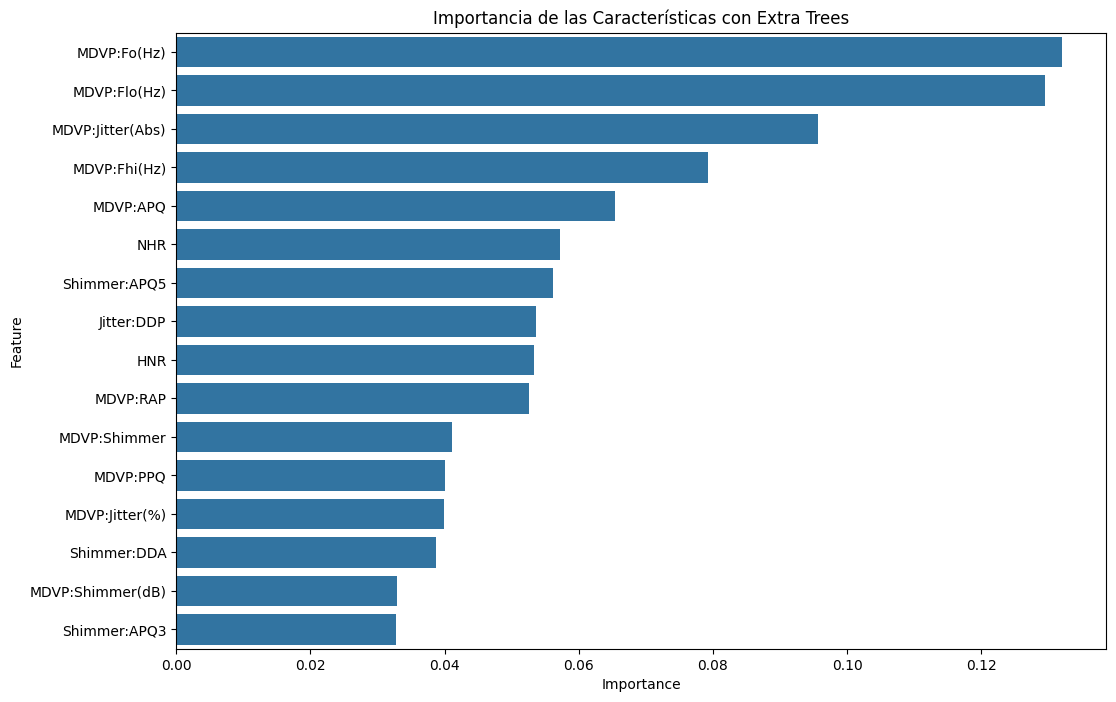

In [ ]:
# Supongamos que df es tu DataFrame original con características y 'status' como la variable objetivo
X = df.drop(columns=['status'])
y = df['status']

# Crear un scaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

# Aplicar el scaler a todas las características numéricas excepto la columna 'gender'
numerical_features = X.select_dtypes(include=['float64'])
scaled_features = scaler.fit_transform(numerical_features)

# Crear un DataFrame con las características estandarizadas
X_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configurar la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instanciar y ajustar la búsqueda en cuadrícula
grid = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f"Best parameters: {grid.best_params_}")

# Ajustar el clasificador con los mejores parámetros
best_clf = grid.best_estimator_

# Obtener la importancia de las características
importances = best_clf.feature_importances_

# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importancia_df)

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importancia_df)
plt.title('Importancia de las Características con Extra Trees')
plt.show()


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de STATUS ya que pertenece solo a 'y' y alimina las características menos relevantes para Tree
X_ = df.drop(columns=['status','MDVP:RAP','MDVP:Shimmer','MDVP:PPQ','MDVP:Shimmer(dB)','MDVP:Jitter(%)','Shimmer:DDA','MDVP:APQ'])
y = df['status']

X_Tree = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de Tree\n')
X_Tree.head(10)

Dataset con las 10 primera características de Tree



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),Jitter:DDP,Shimmer:APQ3,Shimmer:APQ5,NHR,HNR
0,0.184308,0.112592,0.054815,0.249012,0.145288,0.332627,0.347354,0.068307,0.511745
1,0.198327,0.094930,0.278323,0.288538,0.191042,0.515986,0.535685,0.059331,0.432577
2,0.165039,0.059128,0.265288,0.328063,0.229411,0.443374,0.446133,0.039596,0.496220
3,0.165004,0.072927,0.264200,0.328063,0.208862,0.475539,0.466079,0.040997,0.495936
4,0.161150,0.080909,0.260107,0.407115,0.282870,0.584553,0.577341,0.054174,0.455499
5,0.187568,0.059232,0.278139,0.288538,0.190079,0.360747,0.401085,0.036827,0.525766
6,0.185909,0.071647,0.284086,0.090909,0.042061,0.062404,0.049796,0.017252,0.668333
7,0.110606,0.023873,0.223606,0.090909,0.036442,0.072034,0.051018,0.008881,0.749858
8,0.043063,0.061082,0.151289,0.209486,0.108525,0.119029,0.095929,0.031989,0.543404
9,0.039139,0.036658,0.148249,0.209486,0.096163,0.189908,0.156716,0.030461,0.545436


#Modelos de Machine Learning

##Arreglo de datos

###Visualización de datos

In [ ]:
print('\nX_CHI2:\n',X_CHI2.info())
print('\nX_Matrix:\n',X_Matrix.info())
print('\nX_Tree: \n',X_Tree.info())
print('\ny: \n',y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Jitter(%)    195 non-null    float64
 1   MDVP:Jitter(Abs)  195 non-null    float64
 2   MDVP:RAP          195 non-null    float64
 3   MDVP:PPQ          195 non-null    float64
 4   Jitter:DDP        195 non-null    float64
 5   MDVP:Shimmer      195 non-null    float64
 6   MDVP:Shimmer(dB)  195 non-null    float64
 7   Shimmer:APQ5      195 non-null    float64
 8   MDVP:APQ          195 non-null    float64
 9   NHR               195 non-null    float64
dtypes: float64(10)
memory usage: 15.4 KB

X_CHI2:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Flo(Hz)      195 n

###División de Dataset

In [ ]:
X_train_CHI2, X_test_CHI2, y_train_CHI2, y_test_CHI2 = train_test_split(X_CHI2, y, test_size=0.20, random_state=42)
X_train_Matrix, X_test_Matrix, y_train_Matrix, y_test_Matrix = train_test_split(X_Matrix, y, test_size=0.20, random_state=42)
X_train_Tree, X_test_Tree, y_train_Tree, y_test_Tree = train_test_split(X_Tree, y, test_size=0.20, random_state=42)


##Árbol de Decisión

###χ²

In [ ]:
clfDTCHI2 = DecisionTreeClassifier()

In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
}
CV_dtCHI2 = GridSearchCV(estimator=clfDTCHI2, param_grid=param_grid, cv= 5)
CV_dtCHI2.fit(X_train_CHI2, y_train_CHI2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtCHI2.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'random_state': 3}

In [ ]:
# dt1CHI2=DecisionTreeClassifier(random_state=34, max_features='sqrt', max_depth=8, criterion='gini')
dt1CHI2=DecisionTreeClassifier(random_state=47, max_features='sqrt', max_depth=17, criterion='gini')

dt1CHI2.fit(X_train_CHI2, y_train_CHI2)
predDTCHI2 = dt1CHI2.predict(X_test_CHI2)
print(classification_report(y_test_CHI2, predDTCHI2))

# Realiza la validación cruzada K = 5
scoresdtCHI2 = cross_val_score(clfDTCHI2, X_CHI2, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scoresdtCHI2.mean(), scoresdtCHI2.std() * 2))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.88      0.91      0.89        32

    accuracy                           0.82        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.81      0.82      0.81        39

Accuracy VC: 0.63 (+/- 0.17)


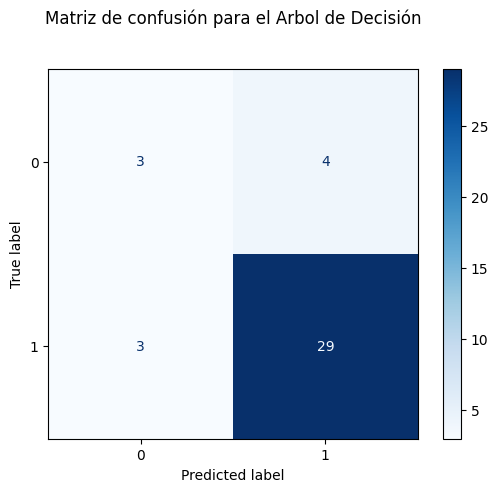

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cmDTCHI2 = ConfusionMatrixDisplay(confusion_matrix(y_test_CHI2, predDTCHI2))
cmDTCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTCHI2 = accuracy_score(y_train_CHI2, dt1CHI2.predict(X_train_CHI2))
test_accuracy_DTCHI2 = accuracy_score(y_test_CHI2, dt1CHI2.predict(X_test_CHI2))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTCHI2)
print("Precisión en el conjunto de prueba:", test_accuracy_DTCHI2)

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.8205128205128205


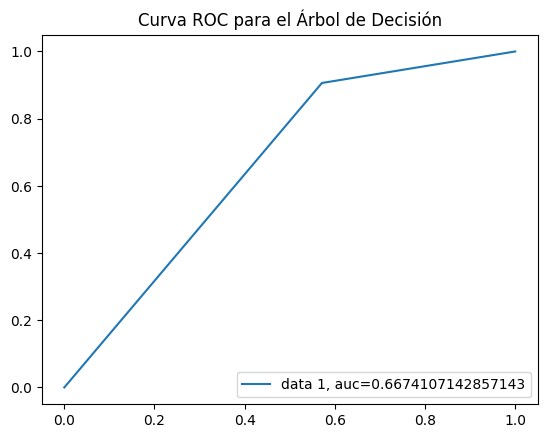

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_probaDTCHI2 = dt1CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcula la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr)
fpr_DTCHI2, tpr_DTCHI2, _ = roc_curve(y_test_CHI2, y_pred_probaDTCHI2)

# Calcula el área bajo la curva ROC (AUC)
auc_DTCHI2 = roc_auc_score(y_test_CHI2, y_pred_probaDTCHI2)

# Grafica la curva ROC
plt.plot(fpr_DTCHI2, tpr_DTCHI2, label="data 1, auc=" + str(auc_DTCHI2))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Calcular e imprimir las métricas en el conjunto de prueba
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test_CHI2, predDTCHI2))

# Calcular la precisión en el conjunto de prueba
test_accuracy_DTCHI2 = accuracy_score(y_test_CHI2, predDTCHI2)
print("Precisión en el conjunto de prueba: %0.2f" % test_accuracy_DTCHI2)

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.88      0.91      0.89        32

    accuracy                           0.82        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.81      0.82      0.81        39

Precisión en el conjunto de prueba: 0.82


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTCHI2, 'dtCHI2_clf.pkl')

['dtCHI2_clf.pkl']

###Matrix

In [ ]:
clfDTMatrix = DecisionTreeClassifier()

In [ ]:
clfDTMatrix.fit(X_train_Matrix, y_train_Matrix)
predDTMatrix = clfDTMatrix.predict(X_test_Matrix)
print(classification_report(y_test_Matrix, predDTMatrix))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.91      0.91      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.74      0.74        39
weighted avg       0.85      0.85      0.85        39



In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
    }
CV_dtMatrix = GridSearchCV(estimator=clfDTMatrix, param_grid=param_grid, cv= 5)
CV_dtMatrix.fit(X_train_Matrix, y_train_Matrix)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtMatrix.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'random_state': 2}

In [ ]:
dt1Matrix=DecisionTreeClassifier(random_state=72, max_features='sqrt', max_depth=5, criterion='gini')
dt1Matrix.fit(X_train_Matrix, y_train_Matrix)
predDTMatrix = dt1Matrix.predict(X_test_Matrix)
print(classification_report(y_test_Matrix, predDTMatrix))

# Realiza la validación cruzada
scoresdtMatrix = cross_val_score(clfDTMatrix, X_Matrix, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scoresdtMatrix.mean(), scoresdtMatrix.std() * 2))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

Accuracy VC: 0.74 (+/- 0.06)


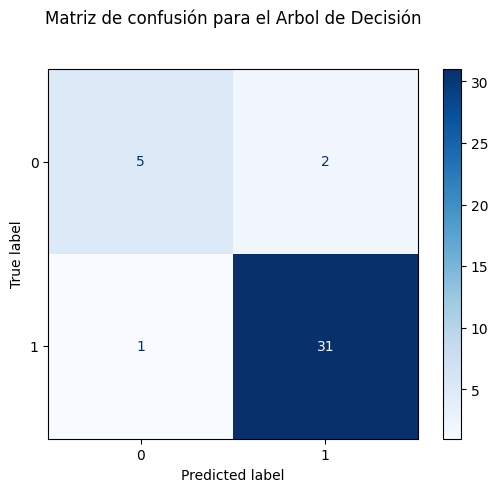

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cm_DTMatrix = ConfusionMatrixDisplay(confusion_matrix(y_test_Matrix, predDTMatrix))
cm_DTMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTMatrix = accuracy_score(y_train_Matrix, dt1Matrix.predict(X_train_Matrix))
test_accuracy_DTMatrix = accuracy_score(y_test_Matrix, dt1Matrix.predict(X_test_Matrix))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTMatrix)
print("Precisión en el conjunto de prueba:", test_accuracy_DTMatrix)

Precisión en el conjunto de entrenamiento: 0.9358974358974359
Precisión en el conjunto de prueba: 0.9230769230769231


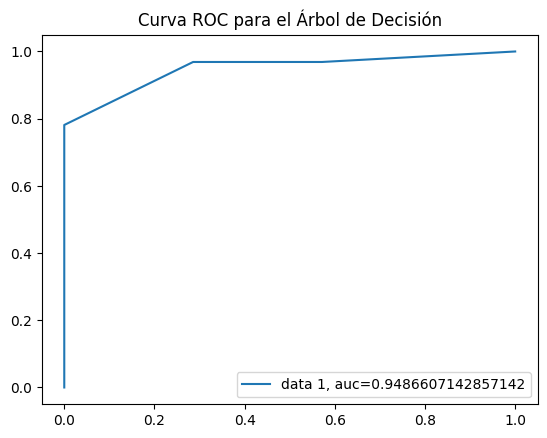

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_proba_DTMatrix = dt1Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcula la tasa de falsos positivos (fprMatrix) y la tasa de verdaderos positivos (tprMatrix)
fprDTMatrix, tprDTMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_DTMatrix)

# Calcula el área bajo la curva ROC (AUC)
aucDTMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_DTMatrix)

# Grafica la curva ROC
plt.plot(fprDTMatrix, tprDTMatrix, label="data 1, auc=" + str(aucDTMatrix))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTMatrix, 'dtMatrix_clf.pkl')

['dtMatrix_clf.pkl']

###Trees

In [ ]:
clfDTTree = DecisionTreeClassifier()
clfDTTree.fit(X_train_Tree, y_train_Tree)
predDTTree = clfDTTree.predict(X_test_Tree)
print(classification_report(y_test_Tree, predDTTree))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31         7
           1       0.85      0.88      0.86        32

    accuracy                           0.77        39
   macro avg       0.59      0.58      0.58        39
weighted avg       0.76      0.77      0.76        39



In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
    }
CV_dtTree = GridSearchCV(estimator=clfDTTree, param_grid=param_grid, cv= 5)
CV_dtTree.fit(X_train_Tree, y_train_Tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtTree.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'random_state': 3}

In [ ]:
#dt1Tree=DecisionTreeClassifier(random_state=34, max_features='sqrt', max_depth=8, criterion='gini')
dt1Tree=DecisionTreeClassifier(random_state=71, max_features='sqrt', max_depth=8, criterion='gini')
dt1Tree.fit(X_train_Tree, y_train_Tree)
predDTTree = dt1Tree.predict(X_test_Tree)
print(classification_report(y_test_Tree, predDTTree))

# Realiza la validación cruzada
scores_DTTree = cross_val_score(clfDTTree, X_Tree, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scores_DTTree.mean(), scores_DTTree.std() * 2))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39

Accuracy VC: 0.73 (+/- 0.18)


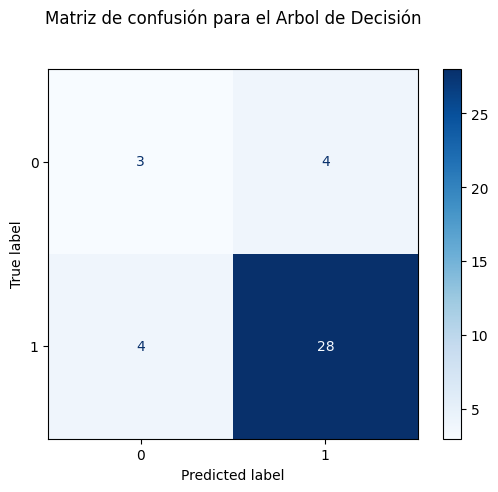

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cm_DTTree = ConfusionMatrixDisplay(confusion_matrix(y_test_Tree, predDTTree))
cm_DTTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTTree = accuracy_score(y_train_Tree, dt1Tree.predict(X_train_Tree))
test_accuracy_DTTree = accuracy_score(y_test_Tree, dt1Tree.predict(X_test_Tree))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTTree)
print("Precisión en el conjunto de prueba:", test_accuracy_DTTree)

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.7948717948717948


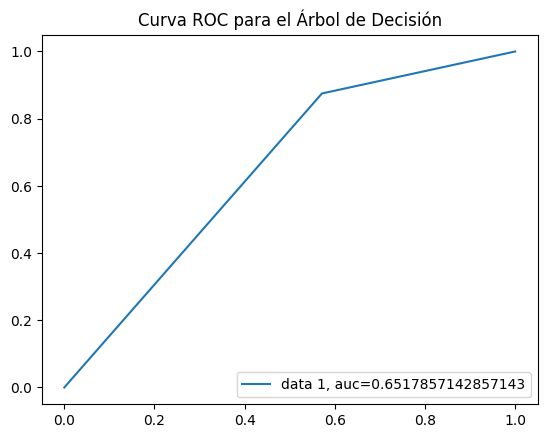

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_proba_DTTree = dt1Tree.predict_proba(X_test_Tree)[:, 1]

# Calcula la tasa de falsos positivos (fprTree) y la tasa de verdaderos positivos (tprTree)
fprDTTree, tprDTTree, _ = roc_curve(y_test_Tree, y_pred_proba_DTTree)

# Calcula el área bajo la curva ROC (AUC)
aucDTTree = roc_auc_score(y_test_Tree, y_pred_proba_DTTree)

# Grafica la curva ROC
plt.plot(fprDTTree, tprDTTree, label="data 1, auc=" + str(aucDTTree))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTTree, 'dtTree_clf.pkl')

['dtTree_clf.pkl']

##KNN -K Vecinos más Cercanos

###χ²

In [ ]:
# Definir los hiperparámetros de forma manual
# knn_CHI2 = KNeighborsClassifier(n_neighbors=29, weights='distance')
knn_CHI2 = KNeighborsClassifier(n_neighbors=24, weights='distance')  #{'distance', 'uniform'} Aquí puedes cambiar los valores manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(knn_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')  # 10 pliegues
cv_score_mean = cv_scores.mean()

print(f"Puntuación media de validación cruzada: {cv_score_mean:.4f}")
#print(f"Puntuaciones de validación cruzada para cada pliegue: {cv_scores}")

# Entrenar el modelo con los hiperparámetros definidos
knn_CHI2.fit(X_train_CHI2, y_train_CHI2)

# Realizar predicciones en el conjunto de prueba
pred_knn_CHI2 = knn_CHI2.predict(X_test_CHI2)
print("\nInforme de Clasificación en el Conjunto de Prueba:\n", classification_report(y_test_CHI2, pred_knn_CHI2))

Puntuación media de validación cruzada: 0.8258

Informe de Clasificación en el Conjunto de Prueba:
               precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        32

    accuracy                           0.85        39
   macro avg       0.76      0.63      0.66        39
weighted avg       0.83      0.85      0.82        39



In [ ]:
# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_CHI2 = knn_CHI2.score(X_train_CHI2, y_train_CHI2)
knn_test_acc_CHI2 = knn_CHI2.score(X_test_CHI2, y_test_CHI2)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_CHI2:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_CHI2:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8462


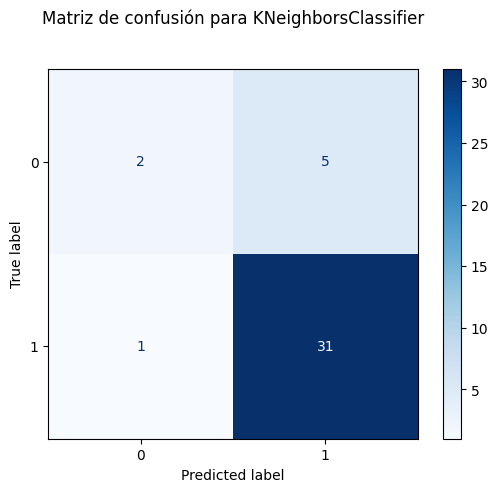


Informe de Clasificación en el Conjunto de Prueba:
               precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        32

    accuracy                           0.85        39
   macro avg       0.76      0.63      0.66        39
weighted avg       0.83      0.85      0.82        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNCHI2 = confusion_matrix(y_test_CHI2, pred_knn_CHI2)
disp_KNNCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNCHI2)
disp_KNNCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nInforme de Clasificación en el Conjunto de Prueba:\n", classification_report(y_test_CHI2, pred_knn_CHI2))

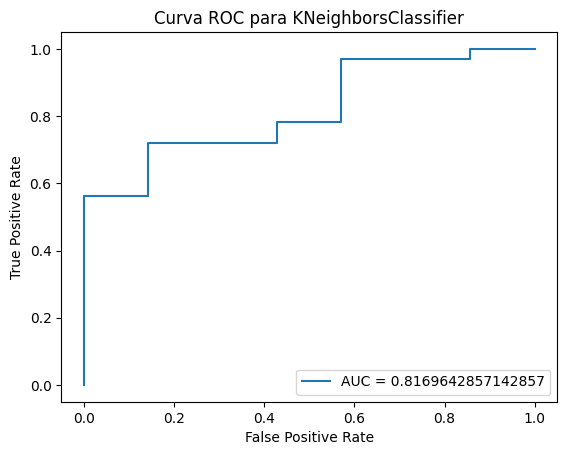

AUC: 0.8170


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNCHI2 = knn_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos para la curva ROC
fpr_KNNCHI2, tpr_KNNCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_KNNCHI2)
auc_KNNCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_KNNCHI2)

# Visualización de la curva ROC
plt.figure()
plt.plot(fpr_KNNCHI2, tpr_KNNCHI2, label="AUC = " + str(auc_KNNCHI2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNCHI2:.4f}")

In [ ]:
# Guardar el modelo KNeighborsClassifier entrenado en un archivo .pkl
joblib.dump(knn_CHI2, 'knnCHI2_clf.pkl')

['knnCHI2_clf.pkl']

###Matriz

In [ ]:
# Definir manualmente los hiperparámetros seleccionados
knn_Matrix = KNeighborsClassifier(n_neighbors=33, weights='distance')  # Ajusta estos valores manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores_Matrix = cross_val_score(knn_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')  # 10 pliegues de validación cruzada
cv_mean_score_Matrix = cv_scores_Matrix.mean()

print(f"Puntuación media de validación cruzada: {cv_mean_score_Matrix:.4f}")

# Entrenar el modelo en el conjunto de entrenamiento
knn_Matrix.fit(X_train_Matrix, y_train_Matrix)

# Realizar predicciones en el conjunto de prueba
pred_knn_Matrix = knn_Matrix.predict(X_test_Matrix)

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_knn_Matrix))

Puntuación media de validación cruzada: 0.8383

Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [ ]:
# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_Matrix = knn_Matrix.score(X_train_Matrix, y_train_Matrix)
knn_test_acc_Matrix = knn_Matrix.score(X_test_Matrix,  y_test_Matrix)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_Matrix:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_Matrix:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8718


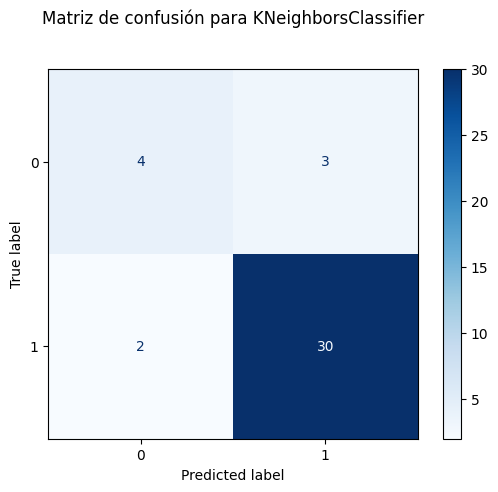

In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNMatrix = confusion_matrix(y_test_Matrix, pred_knn_Matrix)
disp_KNNMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNMatrix)
disp_KNNMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

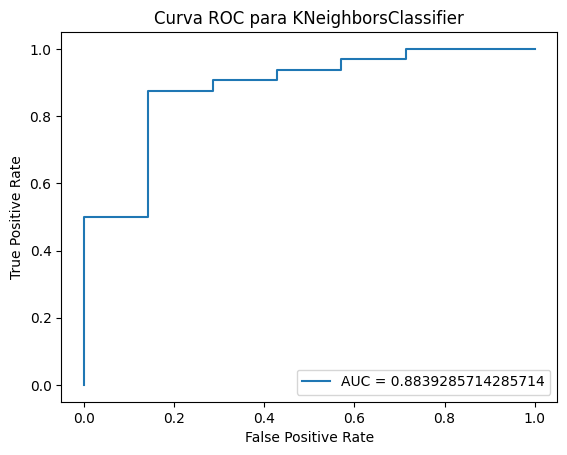

AUC: 0.8839


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNMatrix = knn_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos para la curva ROC
fpr_KNNMatrix, tpr_KNNMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_KNNMatrix)
auc_KNNMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_KNNMatrix)

# Visualización de la curva ROC
plt.plot(fpr_KNNMatrix, tpr_KNNMatrix, label="AUC = " + str(auc_KNNMatrix))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNMatrix:.4f}")

In [ ]:
# Dumping KNN Classifier
joblib.dump(pred_knn_Matrix, 'knnMatrix_clf.pkl')

['knnMatrix_clf.pkl']

###Tree

In [ ]:
# Definir el modelo KNeighborsClassifier con los hiperparámetros manuales
knn_Tree = KNeighborsClassifier(n_neighbors=11, weights='distance')  # Ajusta los hiperparámetros manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores_Tree = cross_val_score(knn_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_Tree = cv_scores_Tree.mean()

print(f"Puntuación media de validación cruzada: {cv_mean_score_Tree:.4f}")

# Entrenar el modelo con los datos de entrenamiento
knn_Tree.fit(X_train_Tree, y_train_Tree)

# Realizar predicciones en el conjunto de prueba
pred_knn_Tree = knn_Tree.predict(X_test_Tree)


# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_knn_Tree))

Puntuación media de validación cruzada: 0.8396

Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



In [ ]:
# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_Tree = knn_Tree.score(X_train_Tree, y_train_Tree)
knn_test_acc_Tree = knn_Tree.score(X_test_Tree, y_test_Tree)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_Tree:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_Tree:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8462


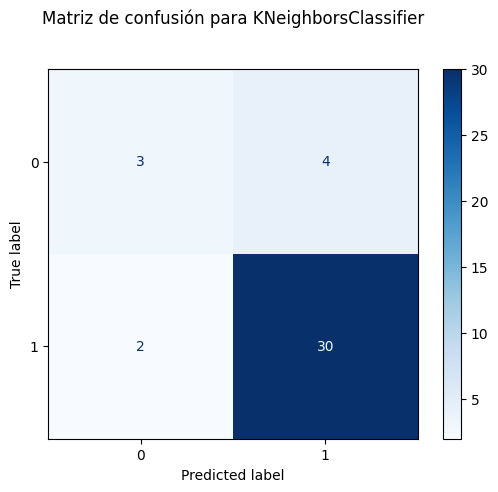

In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNTree = confusion_matrix(y_test_Tree, pred_knn_Tree)
disp_KNNTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNTree)
disp_KNNTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

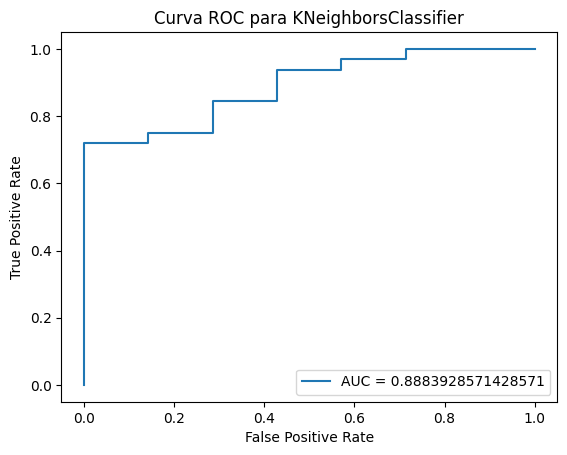

AUC: 0.8884


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNTree = knn_Tree.predict_proba(X_test_Tree)[:, 1]  # Utiliza el modelo entrenado (no best_estimator)

# Calcular la curva ROC y el AUC
fpr_KNNTree, tpr_KNNTree, _ = roc_curve(y_test_Tree, y_pred_proba_KNNTree)
auc_KNNTree = roc_auc_score(y_test_Tree, y_pred_proba_KNNTree)

# Visualización de la curva ROC
plt.plot(fpr_KNNTree, tpr_KNNTree, label="AUC = " + str(auc_KNNTree))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNTree:.4f}")

In [ ]:
# Dumping KNN Classifier
joblib.dump(pred_knn_Tree, 'knnTree_clf.pkl')

['knnTree_clf.pkl']

##Random Forest

###χ²

In [ ]:
rfCHI2 = RandomForestClassifier(random_state=42)

In [ ]:
param_distributions_RFCHI2 = {
    'n_estimators': [1,2,3],  # Número de árboles
    'max_depth': [1,2,3],   # Profundidad máxima del árbol
    'min_samples_split': [1,2,3],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1,2,3],             # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Número de características a considerar para la mejor división
    'bootstrap': [True, False],                # Si usar o no muestreo con reemplazo
    'criterion': ['gini', 'entropy', 'log_loss']           # Función de medición de la calidad de una división
}

# Configurar RandomizedSearchCV para buscar los mejores hiperparámetros
random_search_rfCHI2 = RandomizedSearchCV(
    estimator = rfCHI2,
    param_distributions = param_distributions_RFCHI2,
    n_iter = 20,  # Número de configuraciones diferentes para probar
    scoring ='accuracy',
    cv=10,  # Validación cruzada de 10 pliegues
    verbose = 1,
    n_jobs = -1  # Usar todos los núcleos disponibles
)

# Entrenar RandomizedSearchCV
random_search_rfCHI2.fit(X_train_CHI2, y_train_CHI2)

print("Mejores parámetros encontrados:")
print(random_search_rfCHI2.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores parámetros encontrados:
{'n_estimators': 3, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 2, 'criterion': 'entropy', 'bootstrap': False}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfCHI2 = RandomForestClassifier(
    n_estimators=200,            # Número de árboles en el bosque
    max_depth=13,               # Profundidad máxima del árbol
    min_samples_split=3,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=7,         # Mínimo de muestras en una hoja
    max_features='sqrt',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=False,            # Uso de muestreo con reemplazo
    criterion='gini',        # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfCHI2.fit(X_train_CHI2, y_train_CHI2)

# Realizar predicciones en el conjunto de prueba
pred_rf_CHI2 = rfCHI2.predict(X_test_CHI2)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfCHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = rfCHI2.score(X_test_CHI2, y_test_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfCHI2 = cross_val_score(rfCHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_rfCHI2 = cv_scores_rfCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfCHI2:.4f}")

Precisión en el conjunto de entrenamiento: 0.9167
Precisión en el conjunto de prueba: 0.8205
Precisión promedio de validación cruzada (10 pliegues): 0.8012


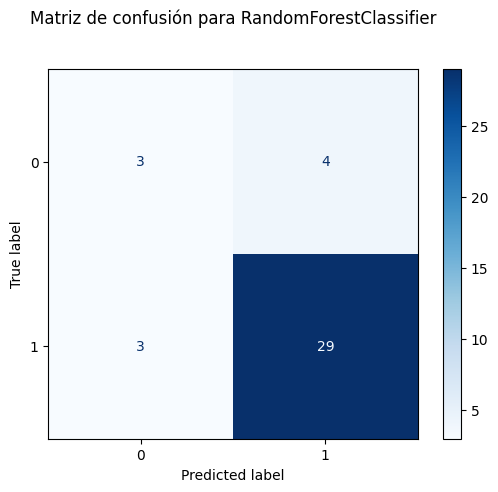


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.88      0.91      0.89        32

    accuracy                           0.82        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.81      0.82      0.81        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFCHI2 = confusion_matrix(y_test_CHI2, pred_rf_CHI2)
disp_RFCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFCHI2)
disp_RFCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_rf_CHI2))

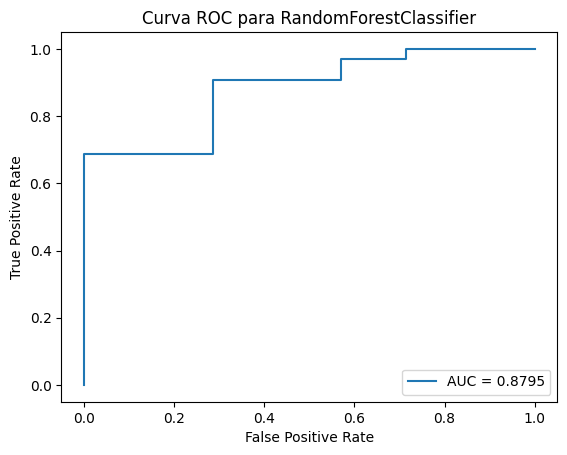

AUC: 0.8795


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfCHI2 = rfCHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_RF_CHI2, tpr_RF_CHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_rfCHI2)
auc_RF_CHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_rfCHI2)

# Visualización de la curva ROC
plt.plot(fpr_RF_CHI2, tpr_RF_CHI2, label="AUC = " + str(round(auc_RF_CHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_RF_CHI2:.4f}")



In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_CHI2, 'rfCHI2_clf.pkl')

['rfCHI2_clf.pkl']

###Matrix

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfMatrix = RandomForestClassifier(
    n_estimators=200,            # Número de árboles en el bosque
    max_depth=13,               # Profundidad máxima del árbol
    min_samples_split=2,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=7,         # Mínimo de muestras en una hoja
    max_features='sqrt',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=False,            # Uso de muestreo con reemplazo
    criterion='gini',           # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfMatrix.fit(X_train_Matrix, y_train_Matrix)
# Realizar predicciones en el conjunto de prueba
pred_rf_Matrix = rfMatrix.predict(X_test_Matrix)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfMatrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_rf_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfMatrix = cross_val_score(rfMatrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_rfMatrix = cv_scores_rfMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.9744
Precisión en el conjunto de prueba: 0.8462
Precisión promedio de validación cruzada (10 pliegues): 0.8583


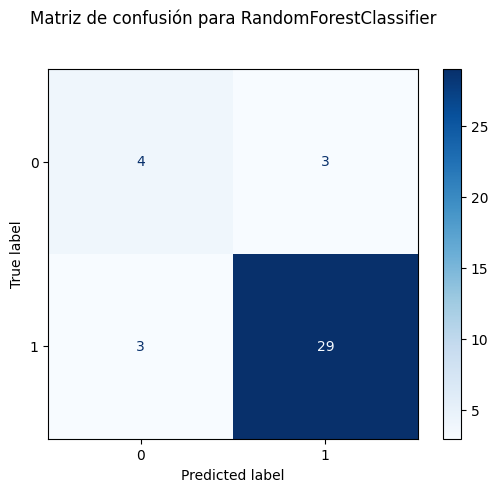


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.91      0.91      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.74      0.74        39
weighted avg       0.85      0.85      0.85        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFMatrix = confusion_matrix(y_test_Matrix, pred_rf_Matrix)
disp_RFMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFMatrix)
disp_RFMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()


# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_rf_Matrix))


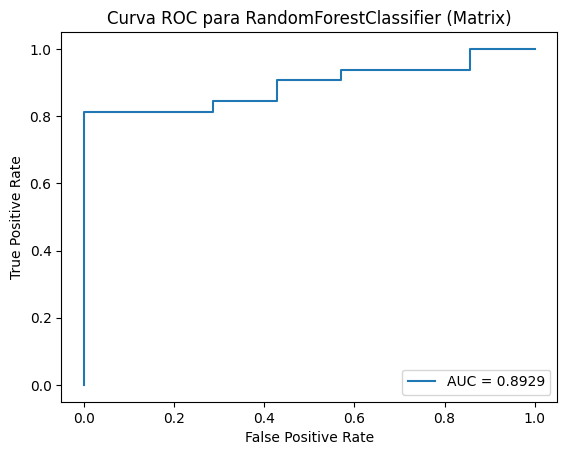

AUC: 0.8929


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfMatrix = rfMatrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_rfMatrix, tpr_rfMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_rfMatrix)
auc_rfMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_rfMatrix)

# Visualización de la curva ROC
plt.plot(fpr_rfMatrix, tpr_rfMatrix, label="AUC = " + str(round(auc_rfMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_rfMatrix:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_Matrix, 'rfMatrix_clf.pkl')

['rfMatrix_clf.pkl']

###Trees

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfTree = RandomForestClassifier(
    n_estimators=100,            # Número de árboles en el bosque
    max_depth=19,               # Profundidad máxima del árbol
    min_samples_split=9,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=3,         # Mínimo de muestras en una hoja
    max_features='sqrt',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=True,            # Uso de muestreo con reemplazo
    criterion='gini',        # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfTree.fit(X_train_Tree, y_train_Tree)

# Realizar predicciones en el conjunto de prueba
pred_rf_Tree = rfTree.predict(X_test_Tree)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfTree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_rf_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfTree = cross_val_score(rfTree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_rfTree = cv_scores_rfTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfTree:.4f}")

Precisión en el conjunto de entrenamiento: 0.9551
Precisión en el conjunto de prueba: 0.8205
Precisión promedio de validación cruzada (10 pliegues): 0.8783


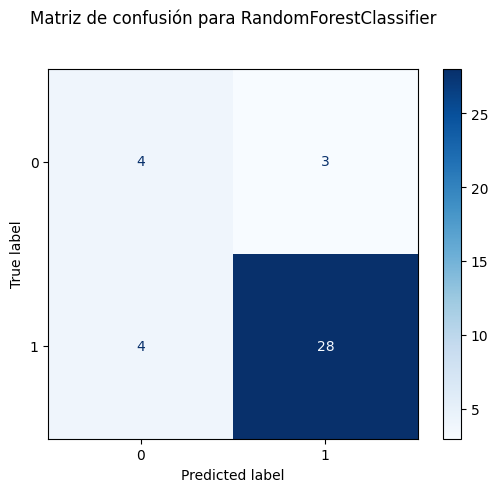


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.90      0.88      0.89        32

    accuracy                           0.82        39
   macro avg       0.70      0.72      0.71        39
weighted avg       0.83      0.82      0.83        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFTree = confusion_matrix(y_test_Tree, pred_rf_Tree)
disp_RFTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFTree)
disp_RFTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_rf_Tree))


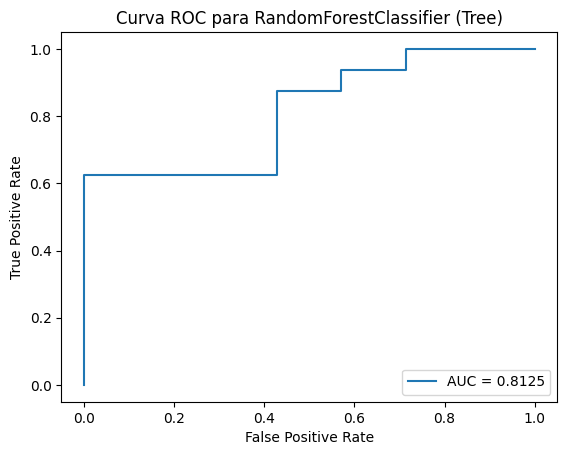

AUC: 0.8125


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfTree = rfTree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_rfTree, tpr_rfTree, _ = roc_curve(y_test_Tree, y_pred_proba_rfTree)
auc_rfTree = roc_auc_score(y_test_Tree, y_pred_proba_rfTree)

# Visualización de la curva ROC
plt.plot(fpr_rfTree, tpr_rfTree, label="AUC = " + str(round(auc_rfTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_rfTree:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_Tree , 'rfTree_clf.pkl')

['rfTree_clf.pkl']


##Bagging

###χ²

In [ ]:
# Definir el clasificador base
DT_Regularized_BAGCHI2 = DecisionTreeClassifier(random_state=1)

# Definir el BaggingClassifier
bagging_clf_CHI2 = BaggingClassifier(estimator=DT_Regularized_BAGCHI2, random_state=42)

# Definir los hiperparámetros a explorar
param_distributions_BAGCHI2 = {
    'n_estimators': [10],
    'max_samples': [0.05],
    'max_features': [0.75],
    'bootstrap': [True, False],
    'estimator__max_depth': [1],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__min_samples_leaf':[1]
}

# Definir el GridSearchCV
random_search_BAGCHI2 = GridSearchCV(estimator=bagging_clf_CHI2, param_grid=param_distributions_BAGCHI2, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
# This is the line that is missing
random_search_BAGCHI2.fit(X_train_CHI2, y_train_CHI2) # Replace X_train and y_train with your actual training data

# Obtener los mejores hiperparámetros y el modelo
best_params = random_search_BAGCHI2.best_params_
best_bagging_clf = random_search_BAGCHI2.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_params)

# Evaluar el modelo ajustado con los mejores hiperparámetros en el conjunto de prueba
test_accuracy_BagCHI2 = best_bagging_clf.score(X_test_CHI2, y_test_CHI2)
print(f"Precisión en el conjunto de prueba con el mejor modelo: {test_accuracy_BagCHI2:.4f}")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Mejores hiperparámetros encontrados: {'bootstrap': False, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__min_samples_leaf': 1, 'max_features': 0.75, 'max_samples': 0.05, 'n_estimators': 10}
Precisión en el conjunto de prueba con el mejor modelo: 0.8462


In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGCHI2 = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,            # Semilla de aleatoriedad
    max_depth=1,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_CHI2 = BaggingClassifier(
    estimator=DT_Regularized_BAGCHI2,
    n_estimators=6,           # Número de modelos en el conjunto
    max_samples=0.24,           # Proporción de muestras a utilizar
    max_features=0.6,          # Proporción de características a utilizar
    bootstrap=True,             # Si usar o no muestreo con reemplazo
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_CHI2.fit(X_train_CHI2, y_train_CHI2)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                   random_state=42),
                  max_features=0.6, max_samples=0.24, n_estimators=6,
                  random_state=42)

In [ ]:
1# Realizar predicciones en el conjunto de prueba
pred_bagging_CHI2 = bagging_clf_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_bagging_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGCHI2 = cross_val_score(bagging_clf_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_BAGCHI2 = cv_scores_BAGCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGCHI2:.4f}")

Precisión en el conjunto de entrenamiento: 0.8205
Precisión en el conjunto de prueba: 0.8974
Precisión promedio de validación cruzada (10 pliegues): 0.7625


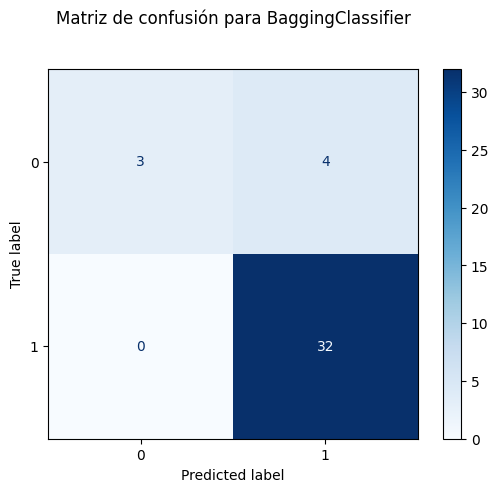


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_BAGCHI2 = confusion_matrix(y_test_CHI2, pred_bagging_CHI2)
disp_BAGCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGCHI2)
disp_BAGCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para BaggingClassifier', y=1.1)
plt.savefig('confusion_matrix.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_bagging_CHI2))

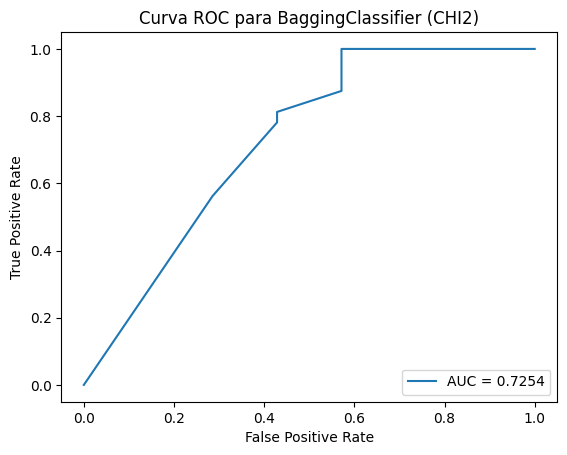

AUC: 0.7254


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_BAGCHI2 = bagging_clf_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGCHI2, tpr_BAGCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_BAGCHI2)
auc_BAGCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_BAGCHI2)

# Visualización de la curva ROC
plt.plot(fpr_BAGCHI2, tpr_BAGCHI2, label="AUC = " + str(round(auc_BAGCHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGCHI2:.4f}")



In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_CHI2, 'best_bagging_clf_CHI2.pkl')

['best_bagging_clf_CHI2.pkl']

###Matrix

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGMatrix = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,            # Semilla de aleatoriedad
    max_depth=1,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_Matrix = BaggingClassifier(
    estimator=DT_Regularized_BAGMatrix,
    n_estimators=6,           # Número de modelos en el conjunto
    max_samples=0.24,           # Proporción de muestras a utilizar
    max_features=0.6,          # Proporción de características a utilizar
    bootstrap=True,             # Si usar o no muestreo con reemplazo
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_Matrix.fit(X_train_Matrix, y_train_Matrix)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                   random_state=42),
                  max_features=0.6, max_samples=0.24, n_estimators=6,
                  random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_bagging_Matrix = bagging_clf_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_bagging_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGMatrix = cross_val_score(bagging_clf_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_BAGMatrix = cv_scores_BAGMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.8590
Precisión en el conjunto de prueba: 0.8462
Precisión promedio de validación cruzada (10 pliegues): 0.7937


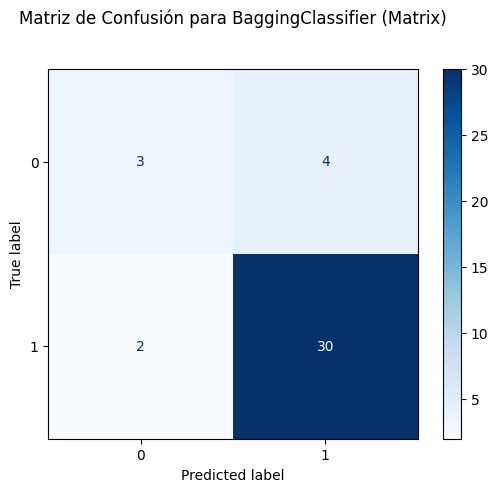


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



In [ ]:
conf_matrix_BAGMatrix = confusion_matrix(y_test_Matrix, pred_bagging_Matrix)
disp_BAGMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGMatrix)
disp_BAGMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para BaggingClassifier (Matrix)', y=1.1)
plt.savefig('confusion_matrix_BAGMatrix.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_bagging_Matrix))


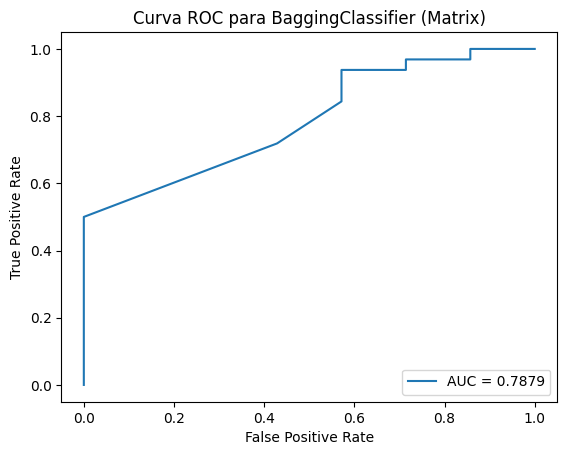

AUC: 0.7879


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_BAGMatrix = bagging_clf_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGMatrix, tpr_BAGMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_BAGMatrix)
auc_BAGMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_BAGMatrix)

# Visualización de la curva ROC
plt.plot(fpr_BAGMatrix, tpr_BAGMatrix, label="AUC = " + str(round(auc_BAGMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGMatrix:.4f}")


In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_Matrix, 'best_bagging_clf_Matrix.pkl')

['best_bagging_clf_Matrix.pkl']

###Tree

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGTree = DecisionTreeClassifier(
    criterion='gini',        # gini  entropy Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=13,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_Tree = BaggingClassifier(
    estimator=DT_Regularized_BAGTree,
    n_estimators=43,           # Número de modelos en el conjunto
    max_samples=0.54,           # Proporción de muestras a utilizar
    max_features=0.65,          # Proporción de características a utilizar
    bootstrap=False,             # Si usar o no muestreo con reemplazo
    random_state=44             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_Tree.fit(X_train_Tree, y_train_Tree)

# Realizar predicciones en el conjunto de prueba
pred_bagging_Tree = bagging_clf_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_bagging_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGTree = cross_val_score(bagging_clf_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_BAGTree = cv_scores_BAGTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGTree:.4f}")

Precisión en el conjunto de entrenamiento: 0.9936
Precisión en el conjunto de prueba: 0.8205
Precisión promedio de validación cruzada (10 pliegues): 0.8913


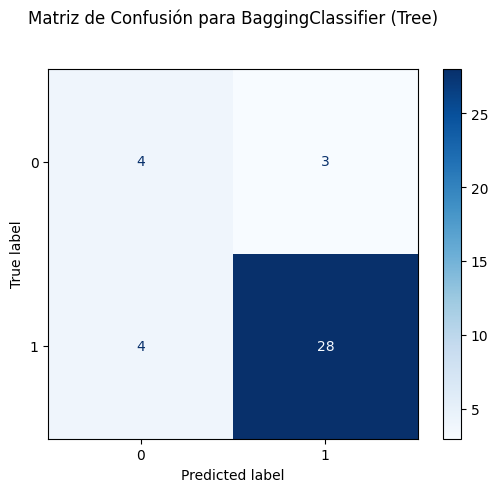


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.90      0.88      0.89        32

    accuracy                           0.82        39
   macro avg       0.70      0.72      0.71        39
weighted avg       0.83      0.82      0.83        39



In [ ]:
# Calcular y mostrar la matriz de confusión
conf_matrix_BAGTree = confusion_matrix(y_test_Tree, pred_bagging_Tree)
disp_BAGTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGTree)
disp_BAGTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para BaggingClassifier (Tree)', y=1.1)
plt.savefig('confusion_matrix_BAGTree.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_bagging_Tree))

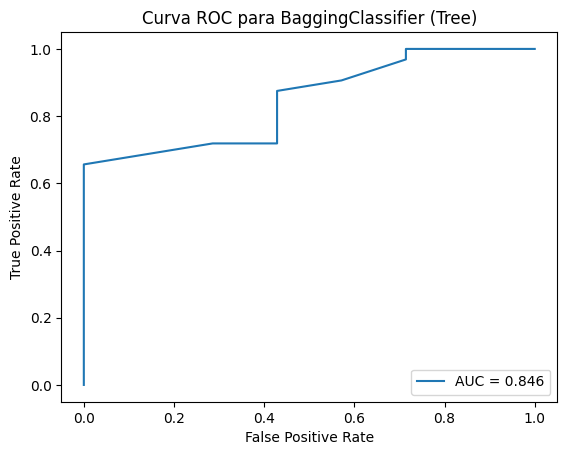

AUC: 0.8460


In [ ]:
y_pred_proba_BAGTree = bagging_clf_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGTree, tpr_BAGTree, _ = roc_curve(y_test_Tree, y_pred_proba_BAGTree)
auc_BAGTree = roc_auc_score(y_test_Tree, y_pred_proba_BAGTree)

# Visualización de la curva ROC
plt.plot(fpr_BAGTree, tpr_BAGTree, label="AUC = " + str(round(auc_BAGTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGTree:.4f}")

In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_Tree, 'best_bagging_clf_Tree.pkl')

['best_bagging_clf_Tree.pkl']

##ADABoost

###χ²

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADACHI2 = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=8,                # Profundidad máxima del árbol base
    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_CHI2 = AdaBoostClassifier(
    estimator=tree_ADACHI2,
    n_estimators=25,           # 25 Número de clasificadores base
    learning_rate=0.78,          # Tasa de aprendizaje
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_CHI2.fit(X_train_CHI2, y_train_CHI2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   learning_rate=0.78, n_estimators=25, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_ada_CHI2 = ada_boost_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_ada_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADACHI2 = cross_val_score(ada_boost_CHI2, X_train_CHI2, y_train_CHI2, cv=3, scoring='accuracy')
cv_mean_score_ADACHI2 = cv_scores_ADACHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADACHI2:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8974
Precisión promedio de validación cruzada (3 pliegues): 0.8718


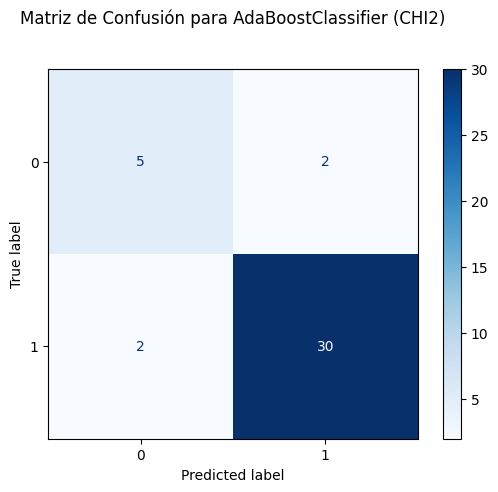


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



In [ ]:
# Calcular y mostrar la matriz de confusión
conf_matrix_ADACHI2 = confusion_matrix(y_test_CHI2, pred_ada_CHI2)
disp_ADACHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADACHI2)
disp_ADACHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para AdaBoostClassifier (CHI2)', y=1.1)
plt.savefig('confusion_matrix_ADACHI2.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_ada_CHI2))

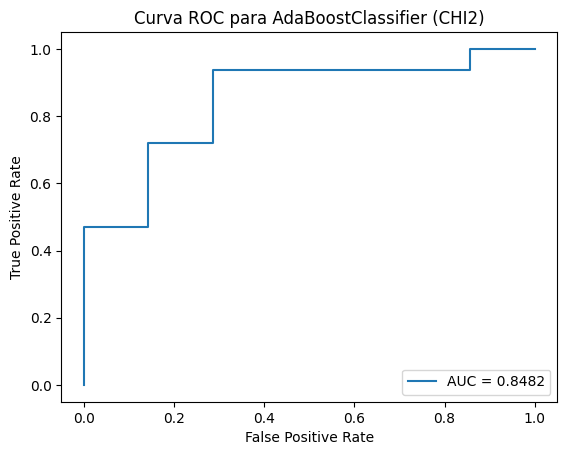

AUC: 0.8482


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADACHI2 = ada_boost_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADACHI2, tpr_ADACHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_ADACHI2)
auc_ADACHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_ADACHI2)

# Visualización de la curva ROC
plt.plot(fpr_ADACHI2, tpr_ADACHI2, label="AUC = " + str(round(auc_ADACHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADACHI2:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_CHI2 , 'ADABoostCHI2_clf.pkl')

['ADABoostCHI2_clf.pkl']

###Matriz

In [ ]:
## Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
#tree_ADAMatrix = DecisionTreeClassifier(
#    criterion='gini',        # Función de calidad de la división
#    random_state=42,             # Semilla de aleatoriedad
#    max_depth=8,                # Profundidad máxima del árbol base
#    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
#)
#
## Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
#ada_boost_Matrix = AdaBoostClassifier(
#    estimator=tree_ADAMatrix,
#    n_estimators=25,           # Número de clasificadores base
#    learning_rate=0.78,          # Tasa de aprendizaje
#    random_state=42             # Semilla de aleatoriedad
#)
#
## Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
#ada_boost_Matrix.fit(X_train_Matrix, y_train_Matrix)

# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADAMatrix = DecisionTreeClassifier(
    criterion='entropy',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=7,                # Profundidad máxima del árbol base
    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_Matrix = AdaBoostClassifier(
    estimator=tree_ADAMatrix,
    n_estimators=97,           # Número de clasificadores base
    learning_rate=0.47,          # Tasa de aprendizaje
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_Matrix.fit(X_train_Matrix, y_train_Matrix)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=7,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   learning_rate=0.47, n_estimators=97, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_ada_Matrix= ada_boost_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_ada_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADAMatrix = cross_val_score(ada_boost_Matrix, X_train_Matrix, y_train_Matrix, cv=3, scoring='accuracy')
cv_mean_score_ADAMatrix = cv_scores_ADAMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADAMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8718
Precisión promedio de validación cruzada (3 pliegues): 0.8526


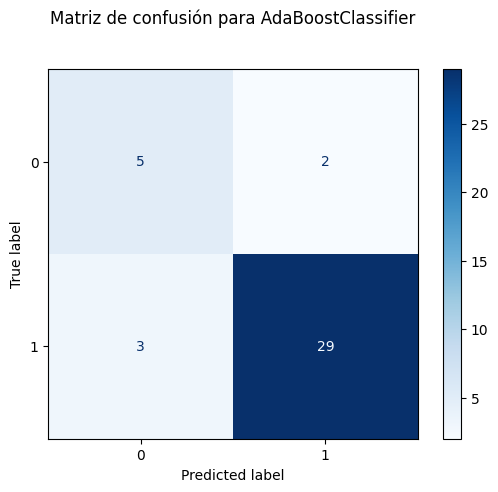


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.94      0.91      0.92        32

    accuracy                           0.87        39
   macro avg       0.78      0.81      0.79        39
weighted avg       0.88      0.87      0.88        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_ADAMatrix = confusion_matrix(y_test_Matrix, pred_ada_Matrix)
disp_ADAMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADAMatrix)
disp_ADAMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para AdaBoostClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_ada_Matrix))

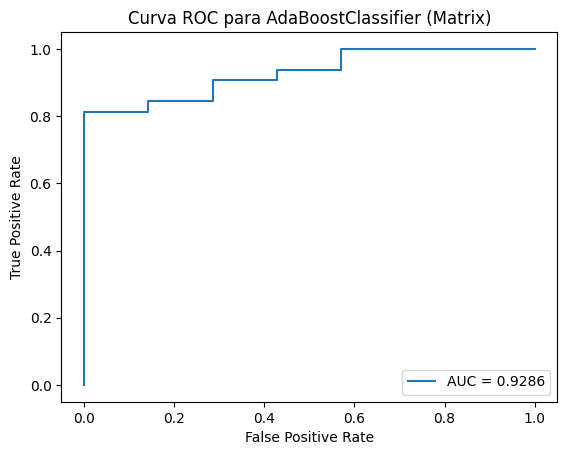

AUC: 0.9286


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADAMatrix = ada_boost_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADAMatrix, tpr_ADAMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_ADAMatrix)
auc_ADAMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_ADAMatrix)

# Visualización de la curva ROC
plt.plot(fpr_ADAMatrix, tpr_ADAMatrix, label="AUC = " + str(round(auc_ADAMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADAMatrix:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_Matrix , 'ADABoostMatrix_clf.pkl')

['ADABoostMatrix_clf.pkl']

###Tree

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADATree = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=9,                # Profundidad máxima del árbol base
    min_samples_leaf=1          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_Tree = AdaBoostClassifier(
    estimator=tree_ADATree,
    n_estimators=200,           # Número de clasificadores     basen_estimators=200,
    learning_rate=0.75,          # Tasa de aprendizaje         learning_rate=1.00,
    random_state=42             # Semilla de aleatoriedad      random_state=42
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_Tree.fit(X_train_Tree, y_train_Tree)

# Realizar predicciones en el conjunto de prueba
pred_ada_Tree = ada_boost_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_ada_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADATree = cross_val_score(ada_boost_Tree, X_train_Tree, y_train_Tree, cv=3, scoring='accuracy')
cv_mean_score_ADATree = cv_scores_ADATree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADATree:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.7949
Precisión promedio de validación cruzada (3 pliegues): 0.8526


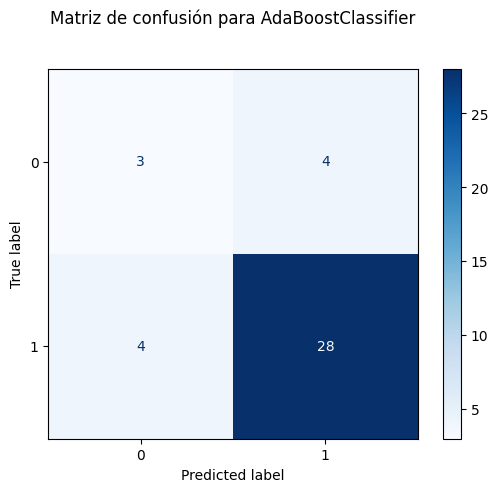


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_ADATree = confusion_matrix(y_test_Tree, pred_ada_Tree)
disp_ADATree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADATree)
disp_ADATree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para AdaBoostClassifier', y=1.1)
plt.show()


# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_ada_Tree))

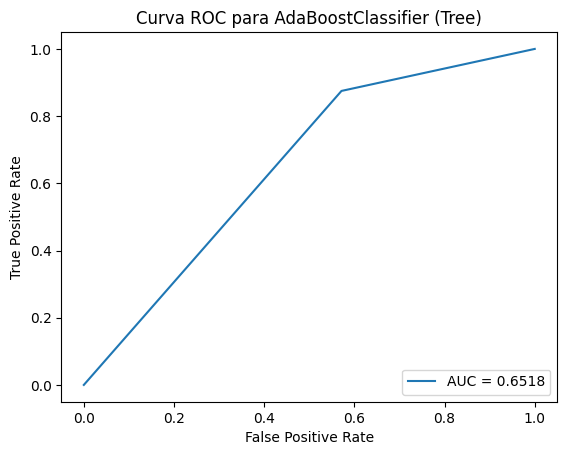

AUC: 0.6518


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADATree = ada_boost_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADATree, tpr_ADATree, _ = roc_curve(y_test_Tree, y_pred_proba_ADATree)
auc_ADATree = roc_auc_score(y_test_Tree, y_pred_proba_ADATree)

# Visualización de la curva ROC
plt.plot(fpr_ADATree, tpr_ADATree, label="AUC = " + str(round(auc_ADATree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADATree:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_Tree , 'ADABoostTree_clf.pkl')

['ADABoostTree_clf.pkl']

##Gradient Boosting

###χ²

In [ ]:
## Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
#gb_CHI2 = GradientBoostingClassifier(
#    n_estimators=100,             # Número de clasificadores base
#    learning_rate=0.05,            # Tasa de aprendizaje
#    max_depth=5,                  # Profundidad máxima de los árboles
#    min_samples_split=5,         # Mínimo de muestras para dividir un nodo
#    min_samples_leaf=2,           # Mínimo de muestras en una hoja
#    subsample=1,                # Fracción de muestras para entrenar cada árbol
#    max_features='sqrt',          # 'sqrt', 'log2' Características para dividir el nodo
#    random_state=42               # Semilla de aleatoriedad
#)
#
## Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
#gb_CHI2.fit(X_train_CHI2, y_train_CHI2)

# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_CHI2 = GradientBoostingClassifier(
    n_estimators=300,             # Número de clasificadores base
    learning_rate=0.01,            # Tasa de aprendizaje
    max_depth=4,                  # Profundidad máxima de los árboles
    min_samples_split=16,         # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,           # Mínimo de muestras en una hoja
    subsample=1,                # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_CHI2.fit(X_train_CHI2, y_train_CHI2)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2',
                           min_samples_leaf=4, min_samples_split=16,
                           n_estimators=300, random_state=42, subsample=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_gb_CHI2 = gb_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_gb_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBCHI2 = cross_val_score(gb_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_GBCHI2 = cv_scores_GBCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBCHI2:.4f}")


Precisión en el conjunto de entrenamiento: 0.9872
Precisión en el conjunto de prueba: 0.8462
Precisión promedio de validación cruzada (10 pliegues): 0.8525


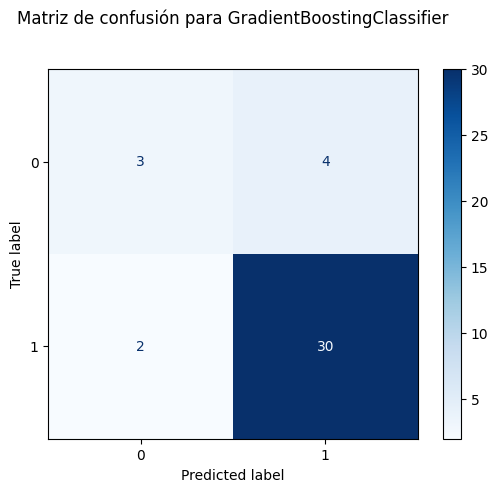


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBCHI2 = confusion_matrix(y_test_CHI2, pred_gb_CHI2)
disp_GBCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBCHI2)
disp_GBCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_gb_CHI2))

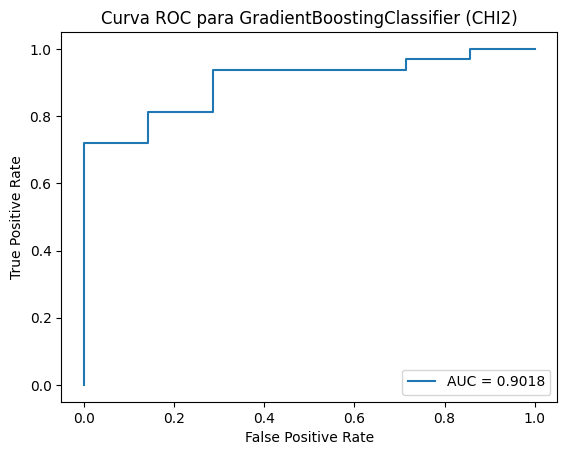

AUC: 0.9017857142857143


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBCHI2 = gb_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBCHI2, tpr_GBCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_GBCHI2)
auc_GBCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_GBCHI2)

# Visualización de la curva ROC
plt.plot(fpr_GBCHI2, tpr_GBCHI2, label="AUC = " + str(round(auc_GBCHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBCHI2}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_CHI2 , 'GB_clf_CHI2.pkl')

['GB_clf_CHI2.pkl']

###Matriz

In [ ]:
# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_Matrix = GradientBoostingClassifier(
    n_estimators=300,             # Número de clasificadores base
    learning_rate=0.01,            # Tasa de aprendizaje
    max_depth=4,                  # Profundidad máxima de los árboles
    min_samples_split=16,         # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,           # Mínimo de muestras en una hoja
    subsample=1,                # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_Matrix.fit(X_train_Matrix, y_train_Matrix)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2',
                           min_samples_leaf=4, min_samples_split=16,
                           n_estimators=300, random_state=42, subsample=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_gb_Matrix = gb_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_gb_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBMatrix = cross_val_score(gb_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_GBMatrix = cv_scores_GBMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.9936
Precisión en el conjunto de prueba: 0.7949
Precisión promedio de validación cruzada (10 pliegues): 0.8850


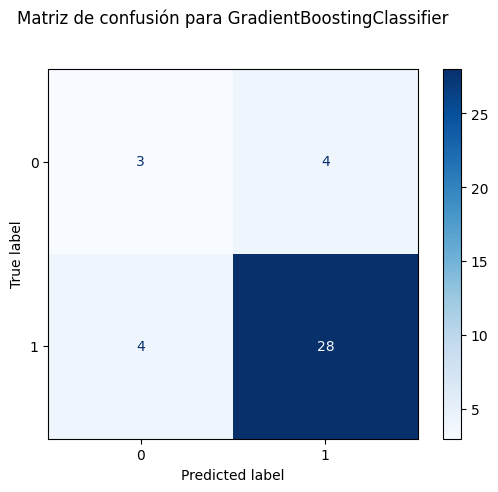


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBMatrix = confusion_matrix(y_test_Matrix, pred_gb_Matrix)
disp_GBMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBMatrix)
disp_GBMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_gb_Matrix))

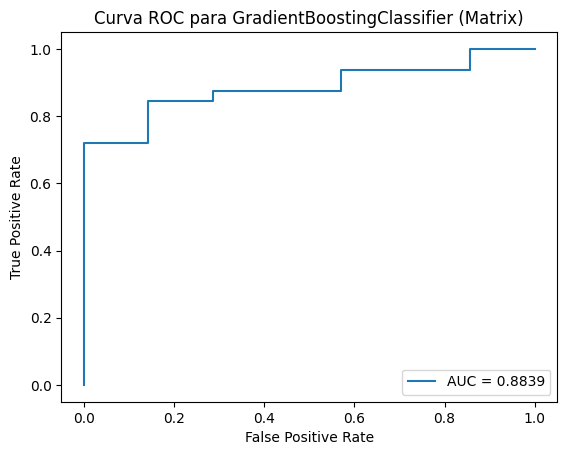

AUC: 0.8839


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBMatrix = gb_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBMatrix, tpr_GBMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_GBMatrix)
auc_GBMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_GBMatrix)

# Visualización de la curva ROC
plt.plot(fpr_GBMatrix, tpr_GBMatrix, label="AUC = " + str(round(auc_GBMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBMatrix:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_Matrix , 'GB_clf_Matrix.pkl')

['GB_clf_Matrix.pkl']

###Tree

In [ ]:
# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_Tree = GradientBoostingClassifier(
    n_estimators=500,             # Número de clasificadores base
    learning_rate=0.63,           # Tasa de aprendizaje
    max_depth=18,                  # Profundidad máxima de los árboles
    min_samples_split=7,          # Mínimo de muestras para dividir un nodo
    min_samples_leaf=12,          # Mínimo de muestras en una hoja
    subsample=1,                  # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_Tree.fit(X_train_Tree, y_train_Tree)

# Realizar predicciones en el conjunto de prueba
pred_gb_Tree = gb_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_gb_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBTree = cross_val_score(gb_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_GBTree = cv_scores_GBTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBTree:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.8205
Precisión promedio de validación cruzada (10 pliegues): 0.8975


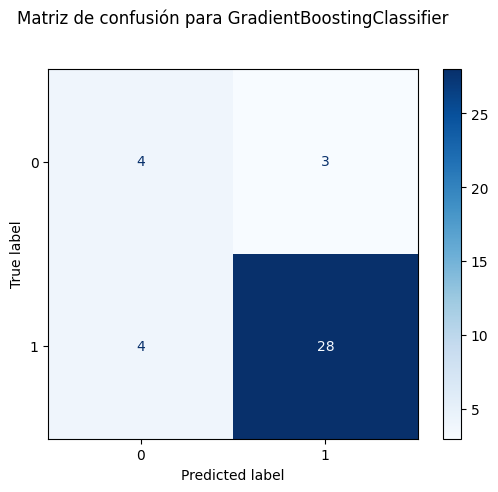


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.90      0.88      0.89        32

    accuracy                           0.82        39
   macro avg       0.70      0.72      0.71        39
weighted avg       0.83      0.82      0.83        39



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBTree = confusion_matrix(y_test_Tree, pred_gb_Tree)
disp_GBTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBTree)
disp_GBTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_gb_Tree))

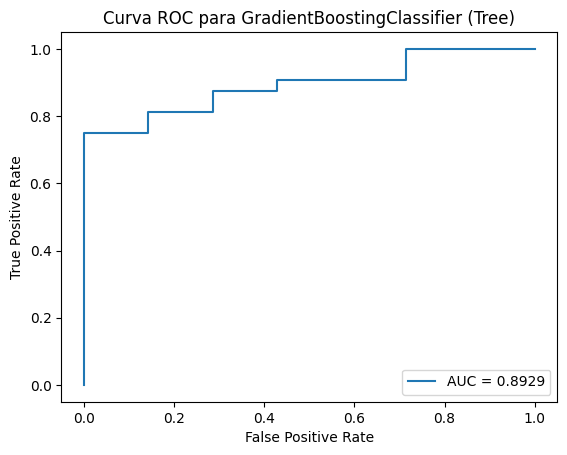

AUC: 0.8929


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBTree = gb_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBTree, tpr_GBTree, _ = roc_curve(y_test_Tree, y_pred_proba_GBTree)
auc_GBTree = roc_auc_score(y_test_Tree, y_pred_proba_GBTree)

# Visualización de la curva ROC
plt.plot(fpr_GBTree, tpr_GBTree, label="AUC = " + str(round(auc_GBTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBTree:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_Tree , 'GB_clf_Tree.pkl')

['GB_clf_Tree.pkl']

#Tabla de comparación

In [ ]:
chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score", "VC"],
        'DT_CHI2':[accuracy_score(y_test_CHI2, predDTCHI2), f1_score(y_test_CHI2, predDTCHI2), recall_score(y_test_CHI2, predDTCHI2), precision_score(y_test_CHI2, predDTCHI2), r2_score(y_test_CHI2, predDTCHI2),scoresdtCHI2.mean()],
        'DT_Mat':[accuracy_score(y_test_Matrix, predDTMatrix), f1_score(y_test_Matrix, predDTMatrix), recall_score(y_test_Matrix, predDTMatrix), precision_score(y_test_Matrix, predDTMatrix), r2_score(y_test_Matrix, predDTMatrix),scoresdtMatrix.mean()],
        'DT_Tree':[accuracy_score(y_test_Tree, predDTTree), f1_score(y_test_Tree, predDTTree), recall_score(y_test_Tree, predDTTree), precision_score(y_test_Tree, predDTTree), r2_score(y_test_Tree, predDTTree),scores_DTTree.mean()],
        'KNN_CHI2':[accuracy_score(y_test_CHI2, pred_knn_CHI2), f1_score(y_test_CHI2, pred_knn_CHI2), recall_score(y_test_CHI2, pred_knn_CHI2), precision_score(y_test_CHI2, pred_knn_CHI2), r2_score(y_test_CHI2, pred_knn_CHI2),cv_score_mean],
        'KNN_Mat':[accuracy_score(y_test_Matrix, pred_knn_Matrix), f1_score(y_test_Matrix, pred_knn_Matrix), recall_score(y_test_Matrix, pred_knn_Matrix), precision_score(y_test_Matrix, pred_knn_Matrix), r2_score(y_test_Matrix, pred_knn_Matrix),cv_mean_score_Matrix],
        'KNN_Tree':[accuracy_score(y_test_Tree, pred_knn_Tree), f1_score(y_test_Tree, pred_knn_Tree), recall_score(y_test_Tree, pred_knn_Tree), precision_score(y_test_Tree, pred_knn_Tree), r2_score(y_test_Tree, pred_knn_Tree),cv_mean_score_Tree],
        'RF_CHI2':[accuracy_score(y_test_CHI2, pred_rf_CHI2), f1_score(y_test_CHI2, pred_rf_CHI2), recall_score(y_test_CHI2, pred_rf_CHI2), precision_score(y_test_CHI2, pred_rf_CHI2), r2_score(y_test_CHI2, pred_rf_CHI2),cv_mean_score_rfCHI2],
        'RF_Mat':[accuracy_score(y_test_Matrix, pred_rf_Matrix), f1_score(y_test_Matrix, pred_rf_Matrix), recall_score(y_test_Matrix, pred_rf_Matrix), precision_score(y_test_Matrix, pred_rf_Matrix), r2_score(y_test_Matrix, pred_rf_Matrix),cv_mean_score_rfMatrix],
        'RF_Tree':[accuracy_score(y_test_Tree, pred_rf_Tree), f1_score(y_test_Tree, pred_rf_Tree), recall_score(y_test_Tree, pred_rf_Tree), precision_score(y_test_Tree, pred_rf_Tree), r2_score(y_test_Tree, pred_rf_Tree),cv_mean_score_rfTree],
        'Bag_CHI2':[accuracy_score(y_test_CHI2, pred_bagging_CHI2), f1_score(y_test_CHI2, pred_bagging_CHI2), recall_score(y_test_CHI2, pred_bagging_CHI2), precision_score(y_test_CHI2, pred_bagging_CHI2), r2_score(y_test_CHI2, pred_bagging_CHI2),cv_mean_score_BAGCHI2],
        'Bag_Mat':[accuracy_score(y_test_Matrix, pred_bagging_Matrix), f1_score(y_test_Matrix, pred_bagging_Matrix), recall_score(y_test_Matrix, pred_bagging_Matrix), precision_score(y_test_Matrix, pred_bagging_Matrix), r2_score(y_test_Matrix, pred_bagging_Matrix),cv_mean_score_BAGMatrix],
        'Bag_Tree':[accuracy_score(y_test_Tree, pred_bagging_Tree), f1_score(y_test_Tree, pred_bagging_Tree), recall_score(y_test_Tree, pred_bagging_Tree), precision_score(y_test_Tree, pred_bagging_Tree), r2_score(y_test_Tree,  pred_bagging_Tree),cv_mean_score_BAGTree],
        'ADAB_CHI2':[accuracy_score(y_test_CHI2, pred_ada_CHI2), f1_score(y_test_CHI2, pred_ada_CHI2), recall_score(y_test_CHI2, pred_ada_CHI2), precision_score(y_test_CHI2, pred_ada_CHI2), r2_score(y_test_CHI2, pred_ada_CHI2),cv_mean_score_ADACHI2],
        'ADAB_Mat':[accuracy_score(y_test_Matrix, pred_ada_Matrix), f1_score(y_test_Matrix, pred_ada_Matrix), recall_score(y_test_Matrix, pred_ada_Matrix), precision_score(y_test_Matrix, pred_ada_Matrix), r2_score(y_test_Matrix, pred_ada_Matrix),cv_mean_score_ADAMatrix],
        'ADAB_Tree':[accuracy_score(y_test_Tree, pred_ada_Tree), f1_score(y_test_Tree, pred_ada_Tree), recall_score(y_test_Tree, pred_ada_Tree), precision_score(y_test_Tree, pred_ada_Tree), r2_score(y_test_Tree, pred_ada_Tree),cv_mean_score_ADATree],
        'GB_CHI2':[accuracy_score(y_test_CHI2, pred_gb_CHI2), f1_score(y_test_CHI2, pred_gb_CHI2), recall_score(y_test_CHI2, pred_gb_CHI2), precision_score(y_test_CHI2, pred_gb_CHI2), r2_score(y_test_CHI2, pred_gb_CHI2),cv_mean_score_GBCHI2],
        'GB_Mat':[accuracy_score(y_test_Matrix, pred_gb_Matrix), f1_score(y_test_Matrix, pred_gb_Matrix), recall_score(y_test_Matrix, pred_gb_Matrix), precision_score(y_test_Matrix, pred_gb_Matrix), r2_score(y_test_Matrix, pred_gb_Matrix),cv_mean_score_GBMatrix],
        'GB_Tree':[accuracy_score(y_test_Tree, pred_gb_Tree), f1_score(y_test_Tree, pred_gb_Tree), recall_score(y_test_Tree, pred_gb_Tree), precision_score(y_test_Tree, pred_gb_Tree), r2_score(y_test_Tree, pred_gb_Tree),cv_mean_score_GBTree]
        }
chart = pd.DataFrame(chart)


In [ ]:
display(chart)

,Metric,DT_CHI2,DT_Mat,DT_Tree,KNN_CHI2,KNN_Mat,KNN_Tree,RF_CHI2,RF_Mat,RF_Tree,Bag_CHI2,Bag_Mat,Bag_Tree,ADAB_CHI2,ADAB_Mat,ADAB_Tree,GB_CHI2,GB_Mat,GB_Tree
0,Accuracy,0.820513,0.923077,0.794872,0.846154,0.871795,0.846154,0.820513,0.846154,0.820513,0.897436,0.846154,0.820513,0.897436,0.871795,0.794872,0.846154,0.794872,0.820513
1,F1-Score,0.892308,0.953846,0.875000,0.911765,0.923077,0.909091,0.892308,0.906250,0.888889,0.941176,0.909091,0.888889,0.937500,0.920635,0.875000,0.909091,0.875000,0.888889
2,Recall,0.906250,0.968750,0.875000,0.968750,0.937500,0.937500,0.906250,0.906250,0.875000,1.000000,0.937500,0.875000,0.937500,0.906250,0.875000,0.937500,0.875000,0.875000
3,Precision,0.878788,0.939394,0.875000,0.861111,0.909091,0.882353,0.878788,0.906250,0.903226,0.888889,0.882353,0.903226,0.937500,0.935484,0.875000,0.882353,0.875000,0.903226
4,R2-Score,-0.218750,0.477679,-0.392857,-0.044643,0.129464,-0.044643,-0.218750,-0.044643,-0.218750,0.303571,-0.044643,-0.218750,0.303571,0.129464,-0.392857,-0.044643,-0.392857,-0.218750
5,VC,0.625641,0.743590,0.733333,0.825833,0.838333,0.839583,0.801250,0.858333,0.878333,0.762500,0.793750,0.891250,0.871795,0.852564,0.852564,0.852500,0.885000,0.897500


#AUC-ROC Comparación

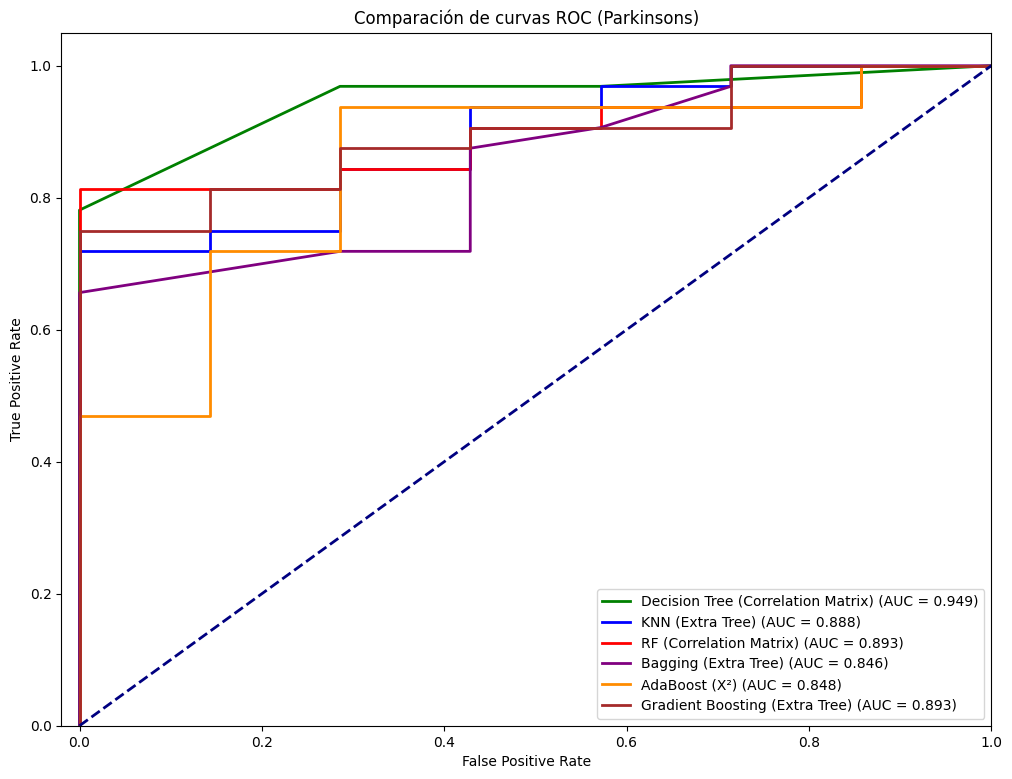

Decision Tree Classifier (Matrix): 0.9487
KNeighbors Classifier: 0.8884
Random Forest Classifier (Matrix): 0.8929
Bagging Classifier: 0.8460
AdaBoost Classifier (X²): 0.8482
Gradient Boosting Classifier: 0.8929


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades de la clase positiva para AdaBoost, utilizando X_test_CHI2
y_pred_proba_ADACHI2 = ada_boost_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Probabilidades de la clase positiva para Decision Tree, utilizando X_test_Matrix
y_pred_proba_DTMatrix = dt1Matrix.predict_proba(X_test_Matrix)[:, 1]

# Probabilidades de la clase positiva para KNeighborsClassifier, utilizando X_test_Tree
y_pred_proba_KNNTree = knn_Tree.predict_proba(X_test_Tree)[:, 1]

# Probabilidades de la clase positiva para RandomForest, utilizando X_test_Matrix
y_pred_proba_rfMatrix = rfMatrix.predict_proba(X_test_Matrix)[:, 1]

# Probabilidades de la clase positiva para BaggingClassifier, utilizando X_test_Tree
y_pred_proba_BAGTree = bagging_clf_Tree.predict_proba(X_test_Tree)[:, 1]

# Probabilidades de la clase positiva para GradientBoostingClassifier, utilizando X_test_Tree
y_pred_proba_GBTree = gb_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular FPR y TPR para cada modelo
fpr_ADACHI2, tpr_ADACHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_ADACHI2)
auc_ADACHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_ADACHI2)

fpr_DTMatrix, tpr_DTMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_DTMatrix)
auc_DTMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_DTMatrix)

fpr_rfMatrix, tpr_rfMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_rfMatrix)
auc_rfMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_rfMatrix)

fpr_KNNTree, tpr_KNNTree, _ = roc_curve(y_test_Tree, y_pred_proba_KNNTree)
auc_KNNTree = roc_auc_score(y_test_Tree, y_pred_proba_KNNTree)

fpr_BAGTree, tpr_BAGTree, _ = roc_curve(y_test_Tree, y_pred_proba_BAGTree)
auc_BAGTree = roc_auc_score(y_test_Tree, y_pred_proba_BAGTree)

fpr_GBTree, tpr_GBTree, _ = roc_curve(y_test_Tree, y_pred_proba_GBTree)
auc_GBTree = roc_auc_score(y_test_Tree, y_pred_proba_GBTree)

# Graficar todas las curvas ROC en la misma figura
plt.figure(figsize=(12, 9))  # Ajusta el tamaño de la figura si es necesario
plt.plot(fpr_DTMatrix, tpr_DTMatrix, color='green', lw=2,
         label=f'Decision Tree (Correlation Matrix) (AUC = {auc_DTMatrix:.3f})')
plt.plot(fpr_KNNTree, tpr_KNNTree, color='blue', lw=2,
         label=f'KNN (Extra Tree) (AUC = {auc_KNNTree:.3f})')
plt.plot(fpr_rfMatrix, tpr_rfMatrix, color='red', lw=2,
         label=f'RF (Correlation Matrix) (AUC = {auc_rfMatrix:.3f})')
plt.plot(fpr_BAGTree, tpr_BAGTree, color='purple', lw=2,
         label=f'Bagging (Extra Tree) (AUC = {auc_BAGTree:.3f})')
plt.plot(fpr_ADACHI2, tpr_ADACHI2, color='darkorange', lw=2,
         label=f'AdaBoost (X²) (AUC = {auc_ADACHI2:.3f})')
plt.plot(fpr_GBTree, tpr_GBTree, color='brown', lw=2,
         label=f'Gradient Boosting (Extra Tree) (AUC = {auc_GBTree:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.02, 1.0])  # Empieza ligeramente antes de 0 para mayor claridad visual
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparación de curvas ROC (Parkinsons)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC para todos los modelos
print(f"Decision Tree Classifier (Matrix): {auc_DTMatrix:.4f}")
print(f"KNeighbors Classifier: {auc_KNNTree:.4f}")
print(f"Random Forest Classifier (Matrix): {auc_rfMatrix:.4f}")
print(f"Bagging Classifier: {auc_BAGTree:.4f}")
print(f"AdaBoost Classifier (X²): {auc_ADACHI2:.4f}")
print(f"Gradient Boosting Classifier: {auc_GBTree:.4f}")
